# Proyek Analisis Data: [Air Quality]
- **Nama:** [Achmad Farhan Aldyno]
- **Email:** [achmad.f.a@mail.ugm.ac.id]
- **ID Dicoding:** [achmadaldyno]

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1: Stasiun mana yang memiliki tingkat polusi paling tinggi?
- Pertanyaan 2: Apakah faktor cuaca pada masing-masing stasiun memiliki korelasi terhadap polusi udara?
- Pertanyaan 3: Apakah ada seasonality pada tingkat polusi di Beijing?

## Import Semua Packages/Library yang Digunakan

Importing all libraries used

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

## Data Wrangling

### Gathering Data

Load all data by iteration

In [3]:
# Set the directory containing the CSV files
directory = "data/"

# Initialize an empty dictionary to store DataFrames
dfs = {}

# Iterate over each file in the directory
for filename in os.listdir(directory):
    if filename.endswith(".csv"):
        # Extract the city name from the filename
        district = filename.split("_")[2]
        district = district.split(".")[0]
        
        # Read the CSV file into a DataFrame
        df = pd.read_csv(os.path.join(directory, filename))
        dfs[district] = df

Creating specific df for each station 

In [4]:
Aoti_df = dfs['Aotizhongxin']
Chan_df = dfs['Changping']
Ding_df = dfs['Dingling']
Dong_df = dfs['Dongsi']
Guan_df = dfs['Guanyuan']
Guch_df = dfs['Gucheng']
Huai_df = dfs['Huairou']
Nong_df = dfs['Nongzhanguan']
Shun_df = dfs['Shunyi']
Tian_df = dfs['Tiantan']
Wanli_df = dfs['Wanliu']
Wansh_df = dfs['Wanshouxigong']

Sample check new station df if all data is inputted correctly

In [5]:
Aoti_df.head() #Check head

No  year  month  day  hour  PM2.5  PM10   SO2   NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    4.0   4.0   4.0   7.0  300.0  77.0  -0.7   
1   2  2013      3    1     1    8.0   8.0   4.0   7.0  300.0  77.0  -1.1   
2   3  2013      3    1     2    7.0   7.0   5.0  10.0  300.0  73.0  -1.1   
3   4  2013      3    1     3    6.0   6.0  11.0  11.0  300.0  72.0  -1.4   
4   5  2013      3    1     4    3.0   3.0  12.0  12.0  300.0  72.0  -2.0   

     PRES  DEWP  RAIN   wd  WSPM       station  
0  1023.0 -18.8   0.0  NNW   4.4  Aotizhongxin  
1  1023.2 -18.2   0.0    N   4.7  Aotizhongxin  
2  1023.5 -18.2   0.0  NNW   5.6  Aotizhongxin  
3  1024.5 -19.4   0.0   NW   3.1  Aotizhongxin  
4  1025.2 -19.5   0.0    N   2.0  Aotizhongxin

In [6]:
Chan_df.tail()

No  year  month  day  hour  PM2.5  PM10  SO2   NO2     CO    O3  \
35059  35060  2017      2   28    19   28.0  47.0  4.0  14.0  300.0   NaN   
35060  35061  2017      2   28    20   12.0  12.0  3.0  23.0  500.0  64.0   
35061  35062  2017      2   28    21    7.0  23.0  5.0  17.0  500.0  68.0   
35062  35063  2017      2   28    22   11.0  20.0  3.0  15.0  500.0  72.0   
35063  35064  2017      2   28    23   20.0  25.0  6.0  28.0  900.0  54.0   

       TEMP    PRES  DEWP  RAIN   wd  WSPM    station  
35059  11.7  1008.9 -13.3   0.0  NNE   1.3  Changping  
35060  10.9  1009.0 -14.0   0.0    N   2.1  Changping  
35061   9.5  1009.4 -13.0   0.0    N   1.5  Changping  
35062   7.8  1009.6 -12.6   0.0   NW   1.4  Changping  
35063   7.0  1009.4 -12.2   0.0    N   1.9  Changping

In [7]:
type(Aoti_df) #Check type

pandas.core.frame.DataFrame

Combining each DF to one DF for easier manipulation

In [8]:
#Combine dataframe for easier data assessment
combined_df = pd.concat(dfs.values(), ignore_index=True)

In [9]:
combined_df

No  year  month  day  hour  PM2.5  PM10   SO2   NO2     CO    O3  \
0           1  2013      3    1     0    4.0   4.0   4.0   7.0  300.0  77.0   
1           2  2013      3    1     1    8.0   8.0   4.0   7.0  300.0  77.0   
2           3  2013      3    1     2    7.0   7.0   5.0  10.0  300.0  73.0   
3           4  2013      3    1     3    6.0   6.0  11.0  11.0  300.0  72.0   
4           5  2013      3    1     4    3.0   3.0  12.0  12.0  300.0  72.0   
...       ...   ...    ...  ...   ...    ...   ...   ...   ...    ...   ...   
420763  35060  2017      2   28    19   11.0  32.0   3.0  24.0  400.0  72.0   
420764  35061  2017      2   28    20   13.0  32.0   3.0  41.0  500.0  50.0   
420765  35062  2017      2   28    21   14.0  28.0   4.0  38.0  500.0  54.0   
420766  35063  2017      2   28    22   12.0  23.0   4.0  30.0  400.0  59.0   
420767  35064  2017      2   28    23   13.0  19.0   4.0  38.0  600.0  49.0   

        TEMP    PRES  DEWP  RAIN   wd  WSPM        station  
0       -0.7  1023.0 -18.8   0.0  NNW   4.4   Aotizhongxin  
1       -1.1  1023.2 -18.2   0.0    N   4.7   Aotizhongxin  
2       -1.1  1023.5 -18.2   0.0  NNW   5.6   Aotizhongxin  
3       -1.4  1024.5 -19.4   0.0   NW   3.1   Aotizhongxin  
4       -2.0  1025.2 -19.5   0.0    N   2.0   Aotizhongxin  
...      ...     ...   ...   ...  ...   ...            ...  
420763  12.5  1013.5 -16.2   0.0   NW   2.4  Wanshouxigong  
420764  11.6  1013.6 -15.1   0.0  WNW   0.9  Wanshouxigong  
420765  10.8  1014.2 -13.3   0.0   NW   1.1  Wanshouxigong  
420766  10.5  1014.4 -12.9   0.0  NNW   1.2  Wanshouxigong  
420767   8.6  1014.1 -15.9   0.0  NNE   1.3  Wanshouxigong  

[420768 rows x 18 columns]

### Assessing Data

#### Unit and meaning of each column/variable

| No  | year | month | day | hour | PM2.5 | PM10 | SO2 | NO2 | CO | O3 | TEMP | PRES | DEWP | RAIN | wd | WSPM | station |
| --- | ---- | ----- | --- | ---- | ----- | ---- | --- | --- | -- | -- | ---- | ---- | ---- | ---- | -- | ---- | ------- |
|     |      |       |     |      | (ug/m^3) | (ug/m^3) | (ug/m^3) | (ug/m^3) | (ug/m^3) | (ug/m^3) | (°C) | (hPa) | (°C) | (mm) |     | (m/s) |         |
| Row number for each station | Year of data | Month of data | Day of data | Hour of data | PM2.5 concentration | PM10 concentration | SO2 concentration | NO2 concentration | CO concentration | O3 concentration | Temperature | Pressure | Dew point temperature | Precipitation | Wind direction | Wind speed | Name of the air-quality monitoring site |

#### Percentage of missing and duplicated values for each column for each station:

Search missing and duplicated values in combined_df

In [10]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420768 entries, 0 to 420767
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   No       420768 non-null  int64  
 1   year     420768 non-null  int64  
 2   month    420768 non-null  int64  
 3   day      420768 non-null  int64  
 4   hour     420768 non-null  int64  
 5   PM2.5    412029 non-null  float64
 6   PM10     414319 non-null  float64
 7   SO2      411747 non-null  float64
 8   NO2      408652 non-null  float64
 9   CO       400067 non-null  float64
 10  O3       407491 non-null  float64
 11  TEMP     420370 non-null  float64
 12  PRES     420375 non-null  float64
 13  DEWP     420365 non-null  float64
 14  RAIN     420378 non-null  float64
 15  wd       418946 non-null  object 
 16  WSPM     420450 non-null  float64
 17  station  420768 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 57.8+ MB


In [11]:
combined_df.isnull().sum()

No             0
year           0
month          0
day            0
hour           0
PM2.5       8739
PM10        6449
SO2         9021
NO2        12116
CO         20701
O3         13277
TEMP         398
PRES         393
DEWP         403
RAIN         390
wd          1822
WSPM         318
station        0
dtype: int64

In [12]:
combined_df.duplicated().sum()

0

None were duplicated. Let's find missing values for each column for each station

In [13]:
# Calculate the percentage of missing values for each column separately for each station
missing_percentage_station = combined_df.groupby('station').agg(lambda x: x.isna().mean() * 100)

In [14]:
# Print the result
print("Percentage of missing values for each column for each station:")
missing_percentage_station

Percentage of missing values for each column for each station:


No  year  month  day  hour     PM2.5      PM10       SO2  \
station                                                                    
Aotizhongxin   0.0   0.0    0.0  0.0   0.0  2.638033  2.047684  2.666553   
Changping      0.0   0.0    0.0  0.0   0.0  2.207392  1.659822  1.791011   
Dingling       0.0   0.0    0.0  0.0   0.0  2.221652  1.870865  2.081907   
Dongsi         0.0   0.0    0.0  0.0   0.0  2.138946  1.577116  1.890828   
Guanyuan       0.0   0.0    0.0  0.0   0.0  1.756788  1.223477  1.351814   
Gucheng        0.0   0.0    0.0  0.0   0.0  1.842345  1.086585  1.445927   
Huairou        0.0   0.0    0.0  0.0   0.0  2.717887  2.215948  2.794889   
Nongzhanguan   0.0   0.0    0.0  0.0   0.0  1.791011  1.254848  1.271960   
Shunyi         0.0   0.0    0.0  0.0   0.0  2.603810  1.562856  3.696099   
Tiantan        0.0   0.0    0.0  0.0   0.0  1.930755  1.702601  3.188455   
Wanliu         0.0   0.0    0.0  0.0   0.0  1.089436  0.809948  1.639859   
Wanshouxigong  0.0   0.0    0.0  0.0   0.0  1.984942  1.380333  1.907940   

                    NO2        CO        O3      TEMP      PRES      DEWP  \
station                                                                     
Aotizhongxin   2.917522  5.065024  4.902464  0.057039  0.057039  0.057039   
Changping      1.902236  4.337782  1.722564  0.151152  0.142596  0.151152   
Dingling       3.519279  5.738079  3.462240  0.151152  0.142596  0.151152   
Dongsi         4.565937  9.117614  1.893680  0.057039  0.057039  0.057039   
Guanyuan       1.879420  4.999430  3.345311  0.057039  0.057039  0.057039   
Gucheng        1.905088  3.995551  2.079055  0.145448  0.142596  0.145448   
Huairou        4.674310  4.055441  3.282569  0.145448  0.151152  0.151152   
Nongzhanguan   1.973534  3.439425  1.443076  0.057039  0.057039  0.057039   
Shunyi         3.892882  6.211499  4.246521  0.145448  0.145448  0.154004   
Tiantan        2.121834  3.211271  2.404175  0.057039  0.057039  0.057039   
Wanliu         3.051563  5.167693  6.009012  0.057039  0.057039  0.057039   
Wanshouxigong  2.150354  3.698950  3.074378  0.054187  0.054187  0.054187   

                   RAIN        wd      WSPM  
station                                      
Aotizhongxin   0.057039  0.231006  0.039927  
Changping      0.145448  0.399270  0.122633  
Dingling       0.145448  0.399270  0.122633  
Dongsi         0.057039  0.222450  0.039927  
Guanyuan       0.057039  0.231006  0.039927  
Gucheng        0.122633  0.453457  0.119781  
Huairou        0.156856  0.861282  0.139744  
Nongzhanguan   0.057039  0.222450  0.039927  
Shunyi         0.145448  1.377481  0.125485  
Tiantan        0.057039  0.222450  0.039927  
Wanliu         0.057039  0.350787  0.039927  
Wanshouxigong  0.054187  0.225302  0.037075

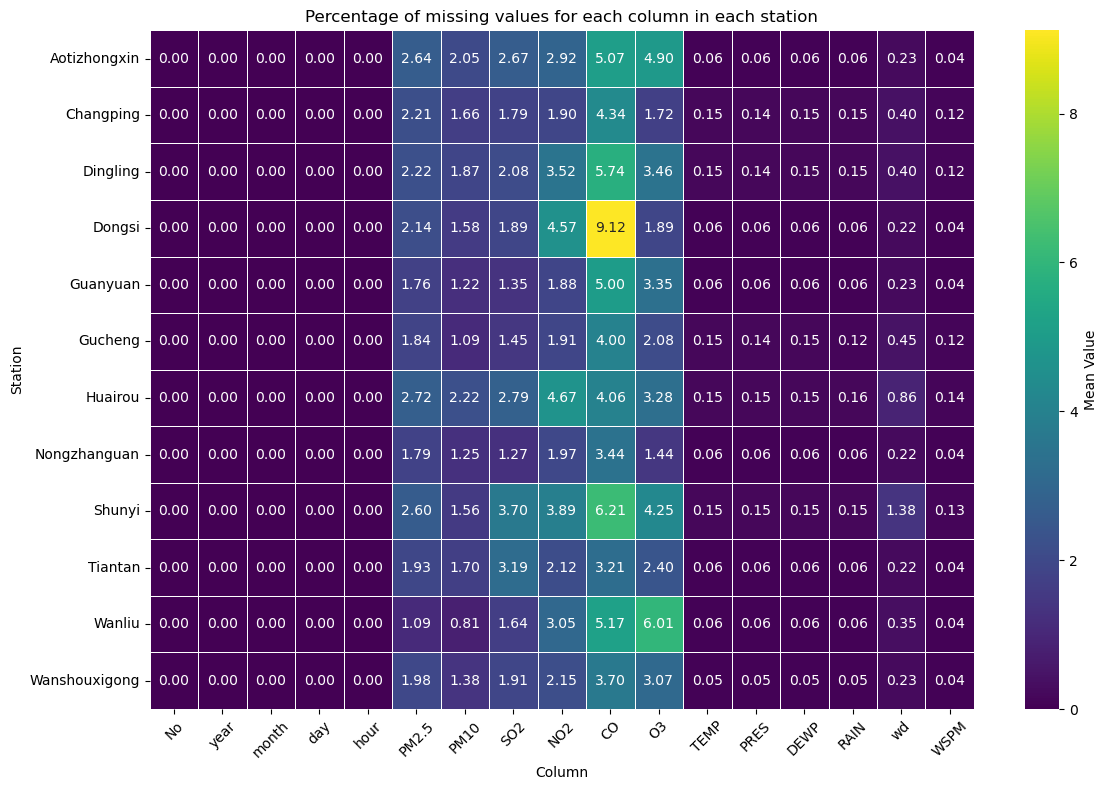

In [15]:
plt.figure(figsize=(12, 8))
sns.heatmap(missing_percentage_station, annot=True, cmap='viridis', fmt=".2f", linewidths=.5, cbar_kws={'label': 'Mean Value'})
plt.title('Percentage of missing values for each column in each station')
plt.xlabel('Column')
plt.ylabel('Station')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Dongsi's CO values has most significant misisng values, followed with Shunyi's, and Wanliu's O3

#### Cleaning Data

To imputate the missing values, let's use interpolation since this is a time series data. For wind direction, assume it's the highest frequency in each station.

In [16]:
# Define a function to impute missing values in each station's data using interpolation
def impute_missing_values(station_data):
    # Interpolate missing values for numerical columns
    station_data_numeric = station_data.select_dtypes(include='number')
    station_data[station_data_numeric.columns] = station_data_numeric.interpolate(method='linear', limit_direction='both')
    
    # Impute missing values for wind direction using forward fill and then backward fill as fallback
    station_data_categorical = station_data.select_dtypes(exclude='number')
    station_data[station_data_categorical.columns] = station_data_categorical.ffill().bfill()

    return station_data

# Group the combined_df DataFrame by station and apply the impute_missing_values function to each group
imputed_df = combined_df.groupby('station').apply(impute_missing_values).reset_index(drop=True)

C:\Users\ALDY\AppData\Local\Temp\ipykernel_15708\3704589446.py:14: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  imputed_df = combined_df.groupby('station').apply(impute_missing_values).reset_index(drop=True)


In [17]:
# Display the imputed DataFrame
imputed_df

No  year  month  day  hour  PM2.5  PM10   SO2   NO2     CO    O3  \
0           1  2013      3    1     0    4.0   4.0   4.0   7.0  300.0  77.0   
1           2  2013      3    1     1    8.0   8.0   4.0   7.0  300.0  77.0   
2           3  2013      3    1     2    7.0   7.0   5.0  10.0  300.0  73.0   
3           4  2013      3    1     3    6.0   6.0  11.0  11.0  300.0  72.0   
4           5  2013      3    1     4    3.0   3.0  12.0  12.0  300.0  72.0   
...       ...   ...    ...  ...   ...    ...   ...   ...   ...    ...   ...   
420763  35060  2017      2   28    19   11.0  32.0   3.0  24.0  400.0  72.0   
420764  35061  2017      2   28    20   13.0  32.0   3.0  41.0  500.0  50.0   
420765  35062  2017      2   28    21   14.0  28.0   4.0  38.0  500.0  54.0   
420766  35063  2017      2   28    22   12.0  23.0   4.0  30.0  400.0  59.0   
420767  35064  2017      2   28    23   13.0  19.0   4.0  38.0  600.0  49.0   

        TEMP    PRES  DEWP  RAIN   wd  WSPM        station  
0       -0.7  1023.0 -18.8   0.0  NNW   4.4   Aotizhongxin  
1       -1.1  1023.2 -18.2   0.0    N   4.7   Aotizhongxin  
2       -1.1  1023.5 -18.2   0.0  NNW   5.6   Aotizhongxin  
3       -1.4  1024.5 -19.4   0.0   NW   3.1   Aotizhongxin  
4       -2.0  1025.2 -19.5   0.0    N   2.0   Aotizhongxin  
...      ...     ...   ...   ...  ...   ...            ...  
420763  12.5  1013.5 -16.2   0.0   NW   2.4  Wanshouxigong  
420764  11.6  1013.6 -15.1   0.0  WNW   0.9  Wanshouxigong  
420765  10.8  1014.2 -13.3   0.0   NW   1.1  Wanshouxigong  
420766  10.5  1014.4 -12.9   0.0  NNW   1.2  Wanshouxigong  
420767   8.6  1014.1 -15.9   0.0  NNE   1.3  Wanshouxigong  

[420768 rows x 18 columns]

Add datetime for easier manipulation and then save

In [18]:
imputed_df['datetime'] = pd.to_datetime(imputed_df[['year', 'month', 'day', 'hour']])

In [20]:
imputed_df.to_csv("dashboard/main_data.csv")

## Exploratory Data Analysis (EDA)

#### Statistical description and histogram for all parameter

Define stations and numerical columns

In [21]:
stations = combined_df['station'].unique()

In [22]:
numerical_columns = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']

Get statistical description (including distribution and correlation), their respective plot (histogram and heatmap) for all numerical and categorical parameter

In [23]:
combined_df.describe()

No           year          month            day  \
count  420768.000000  420768.000000  420768.000000  420768.000000   
mean    17532.500000    2014.662560       6.522930      15.729637   
std     10122.116943       1.177198       3.448707       8.800102   
min         1.000000    2013.000000       1.000000       1.000000   
25%      8766.750000    2014.000000       4.000000       8.000000   
50%     17532.500000    2015.000000       7.000000      16.000000   
75%     26298.250000    2016.000000      10.000000      23.000000   
max     35064.000000    2017.000000      12.000000      31.000000   

                hour          PM2.5           PM10            SO2  \
count  420768.000000  412029.000000  414319.000000  411747.000000   
mean       11.500000      79.793428     104.602618      15.830835   
std         6.922195      80.822391      91.772426      21.650603   
min         0.000000       2.000000       2.000000       0.285600   
25%         5.750000      20.000000      36.000000       3.000000   
50%        11.500000      55.000000      82.000000       7.000000   
75%        17.250000     111.000000     145.000000      20.000000   
max        23.000000     999.000000     999.000000     500.000000   

                 NO2             CO             O3           TEMP  \
count  408652.000000  400067.000000  407491.000000  420370.000000   
mean       50.638586    1230.766454      57.372271      13.538976   
std        35.127912    1160.182716      56.661607      11.436139   
min         1.026500     100.000000       0.214200     -19.900000   
25%        23.000000     500.000000      11.000000       3.100000   
50%        43.000000     900.000000      45.000000      14.500000   
75%        71.000000    1500.000000      82.000000      23.300000   
max       290.000000   10000.000000    1071.000000      41.600000   

                PRES           DEWP           RAIN           WSPM  
count  420375.000000  420365.000000  420378.000000  420450.000000  
mean     1010.746982       2.490822       0.064476       1.729711  
std        10.474055      13.793847       0.821004       1.246386  
min       982.400000     -43.400000       0.000000       0.000000  
25%      1002.300000      -8.900000       0.000000       0.900000  
50%      1010.400000       3.100000       0.000000       1.400000  
75%      1019.000000      15.100000       0.000000       2.200000  
max      1042.800000      29.100000      72.500000      13.200000

Statistics for Aotizhongxin station



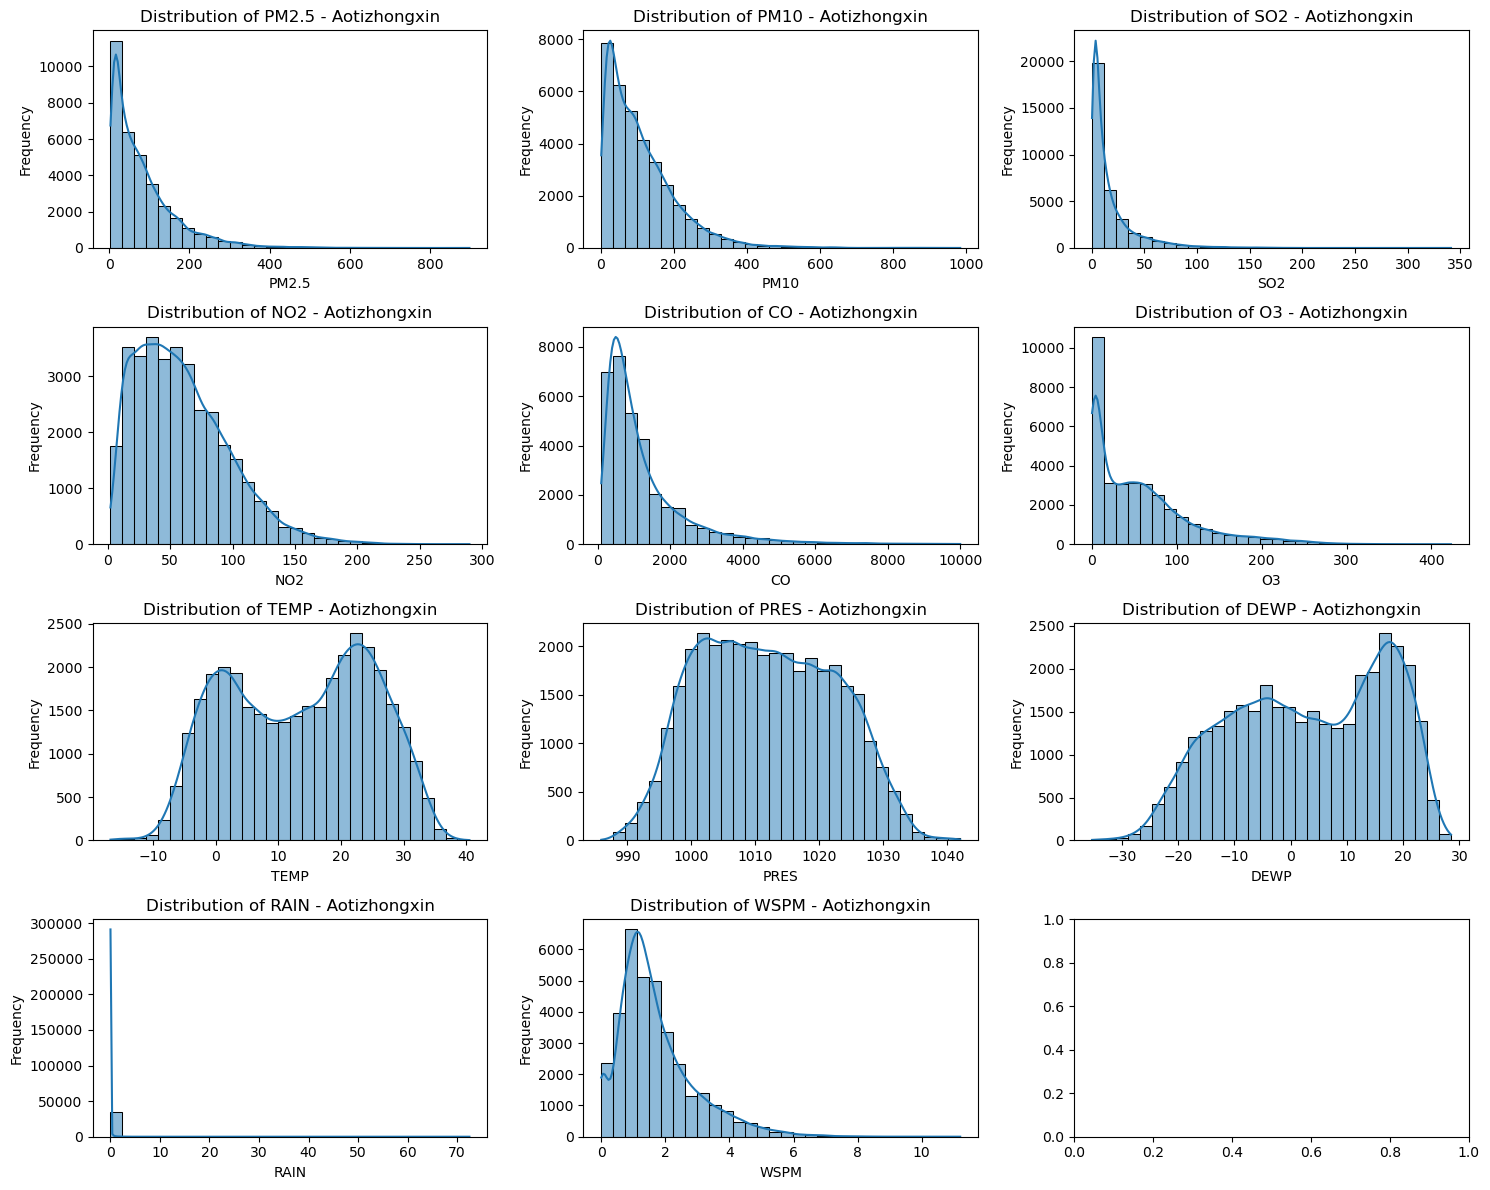



Statistics for Changping station



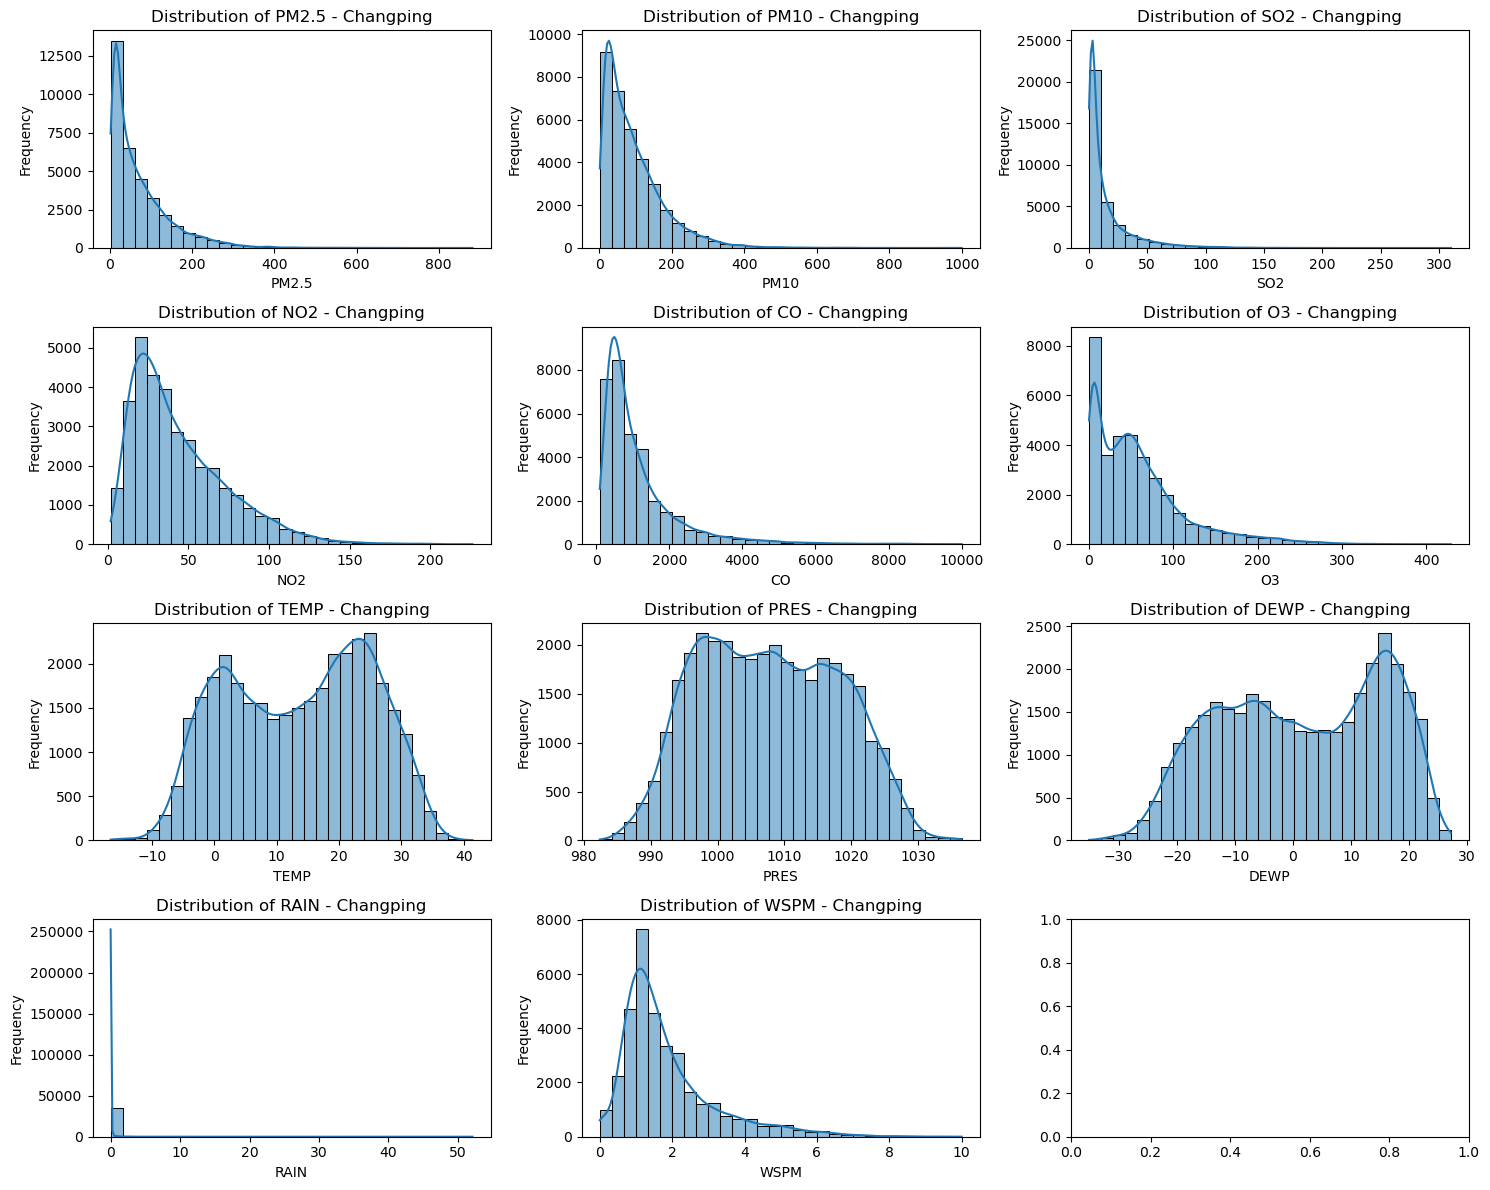



Statistics for Dingling station



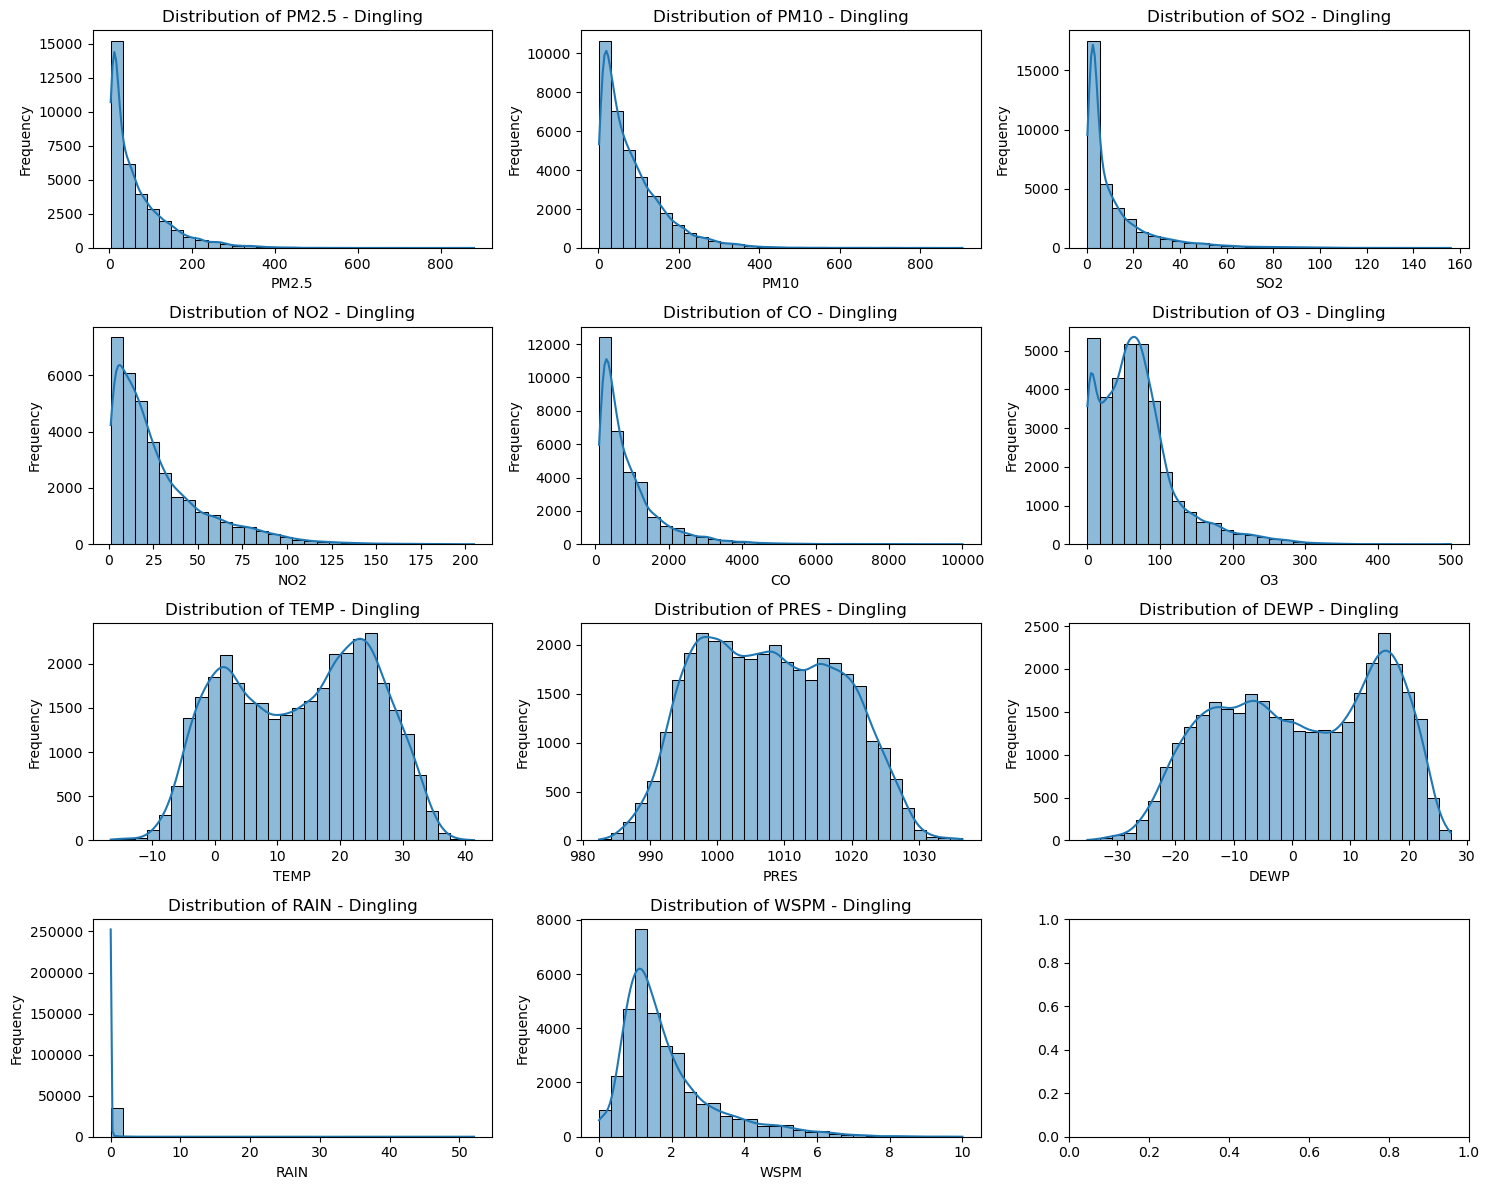



Statistics for Dongsi station



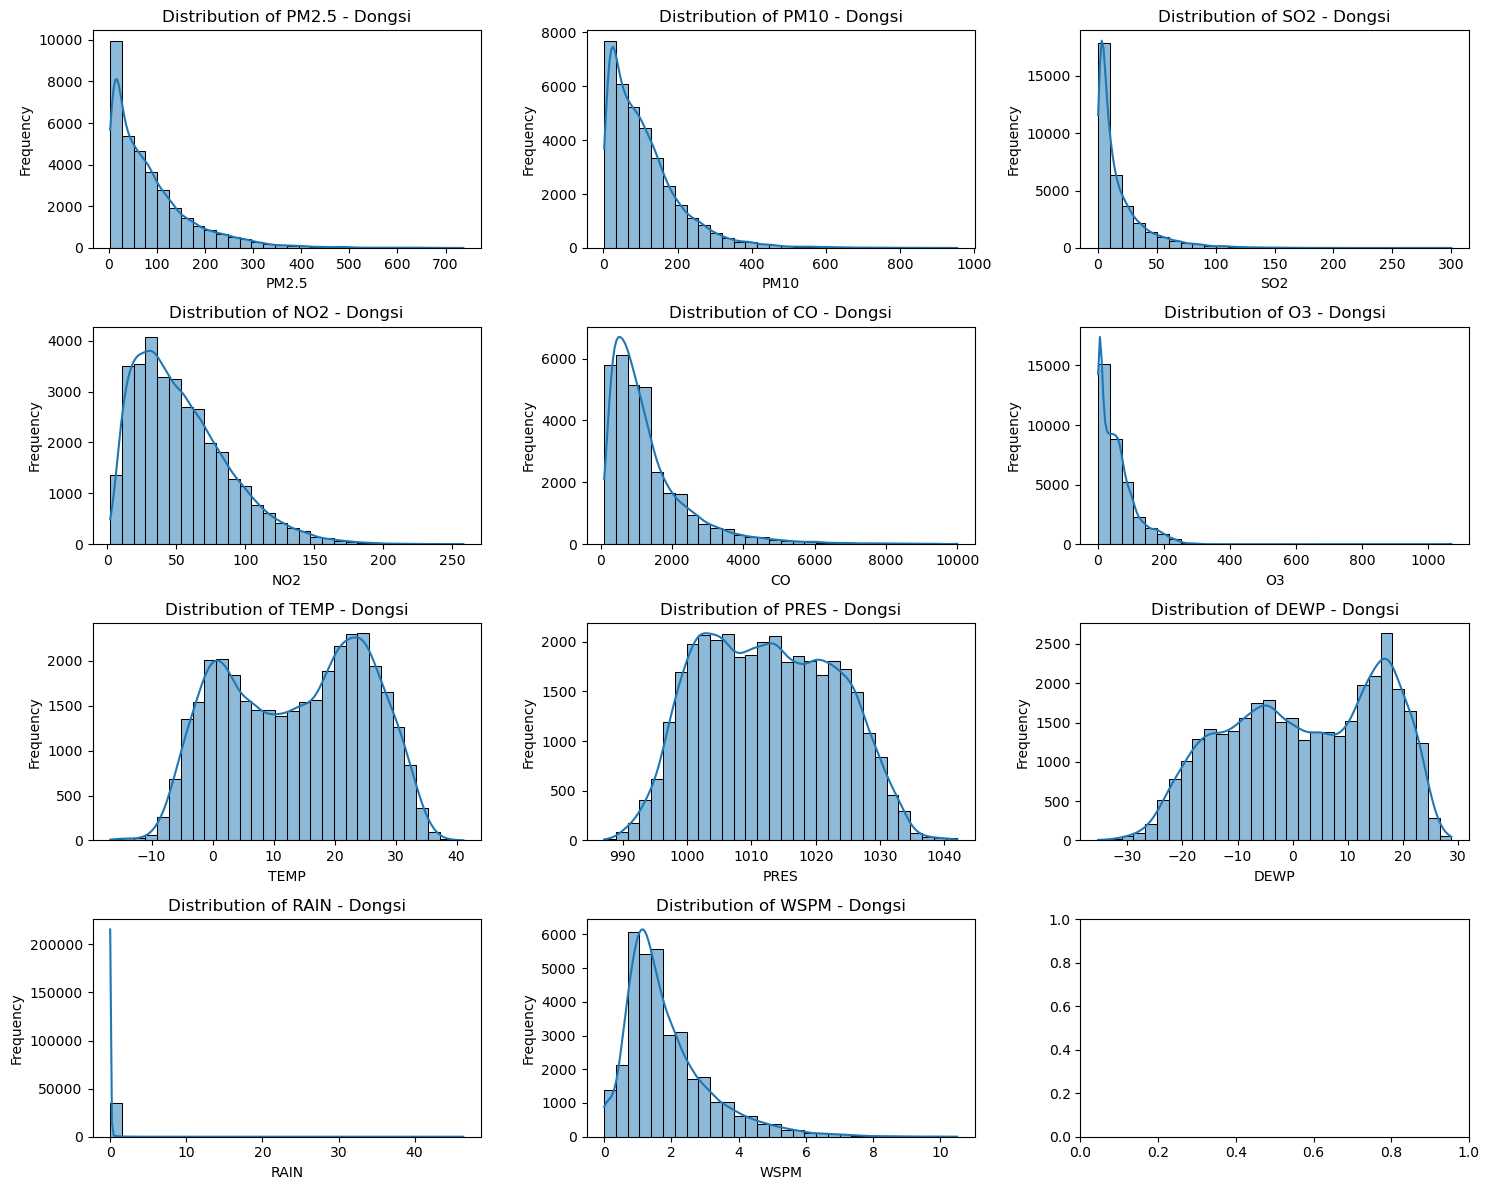



Statistics for Guanyuan station



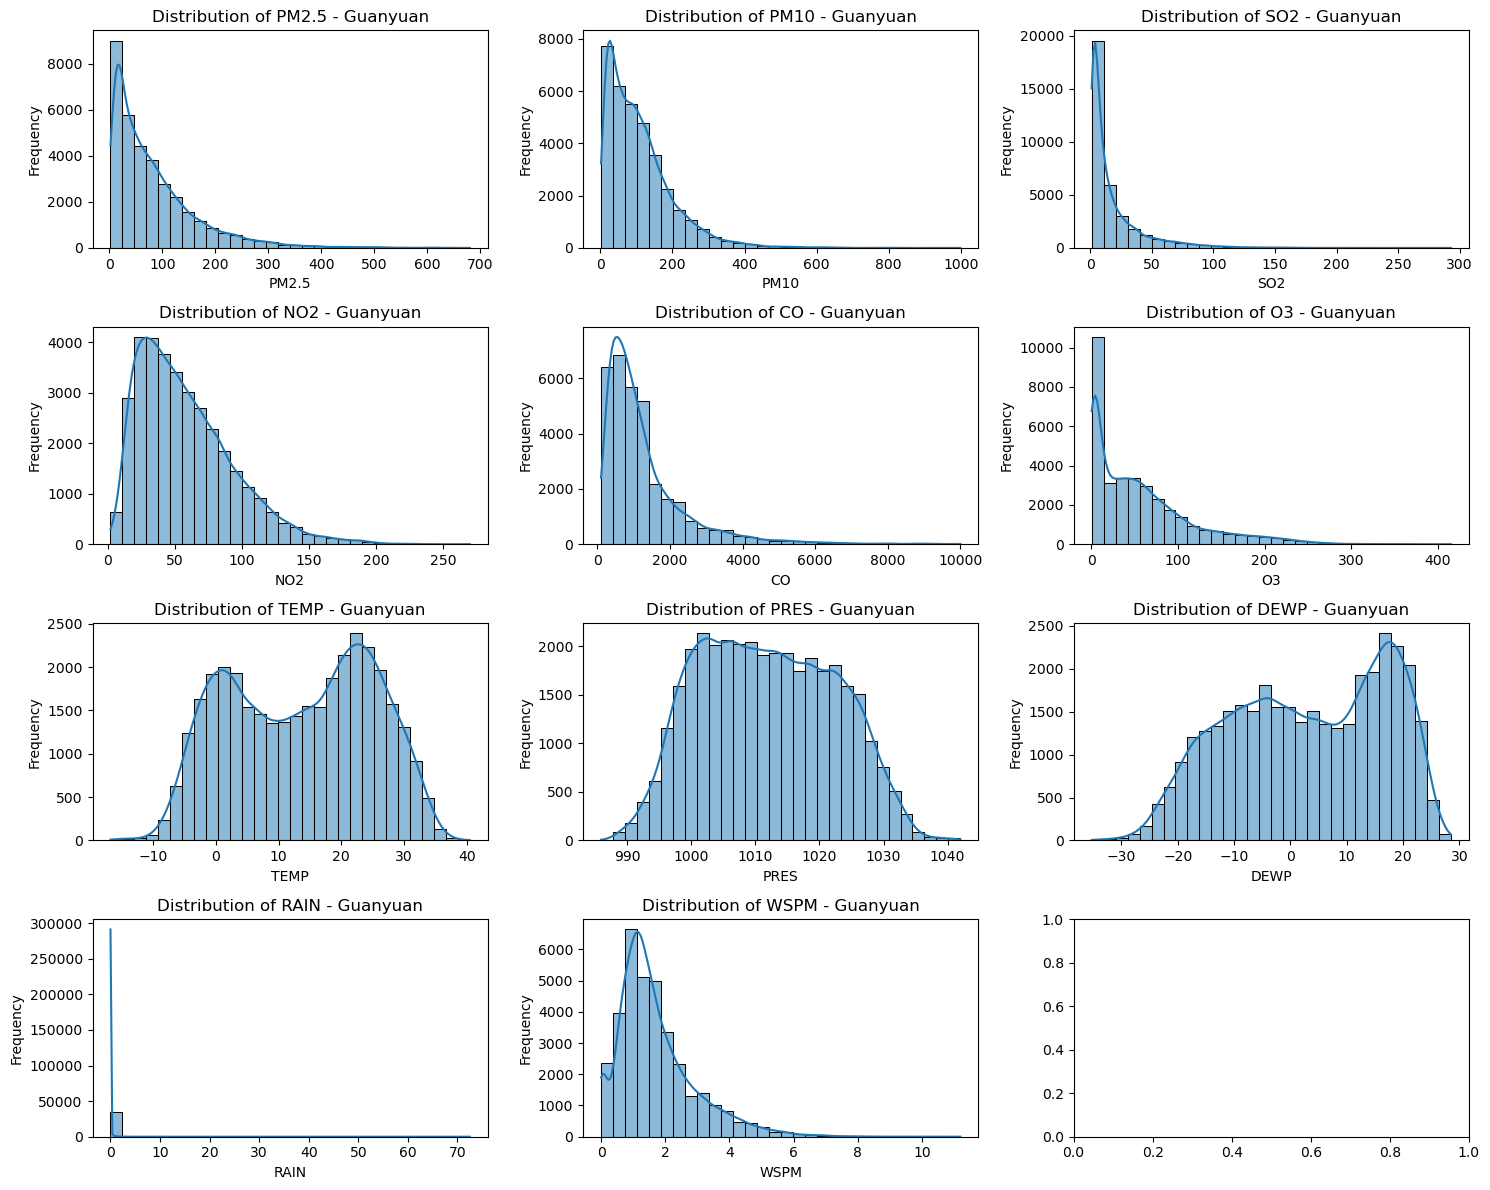



Statistics for Gucheng station



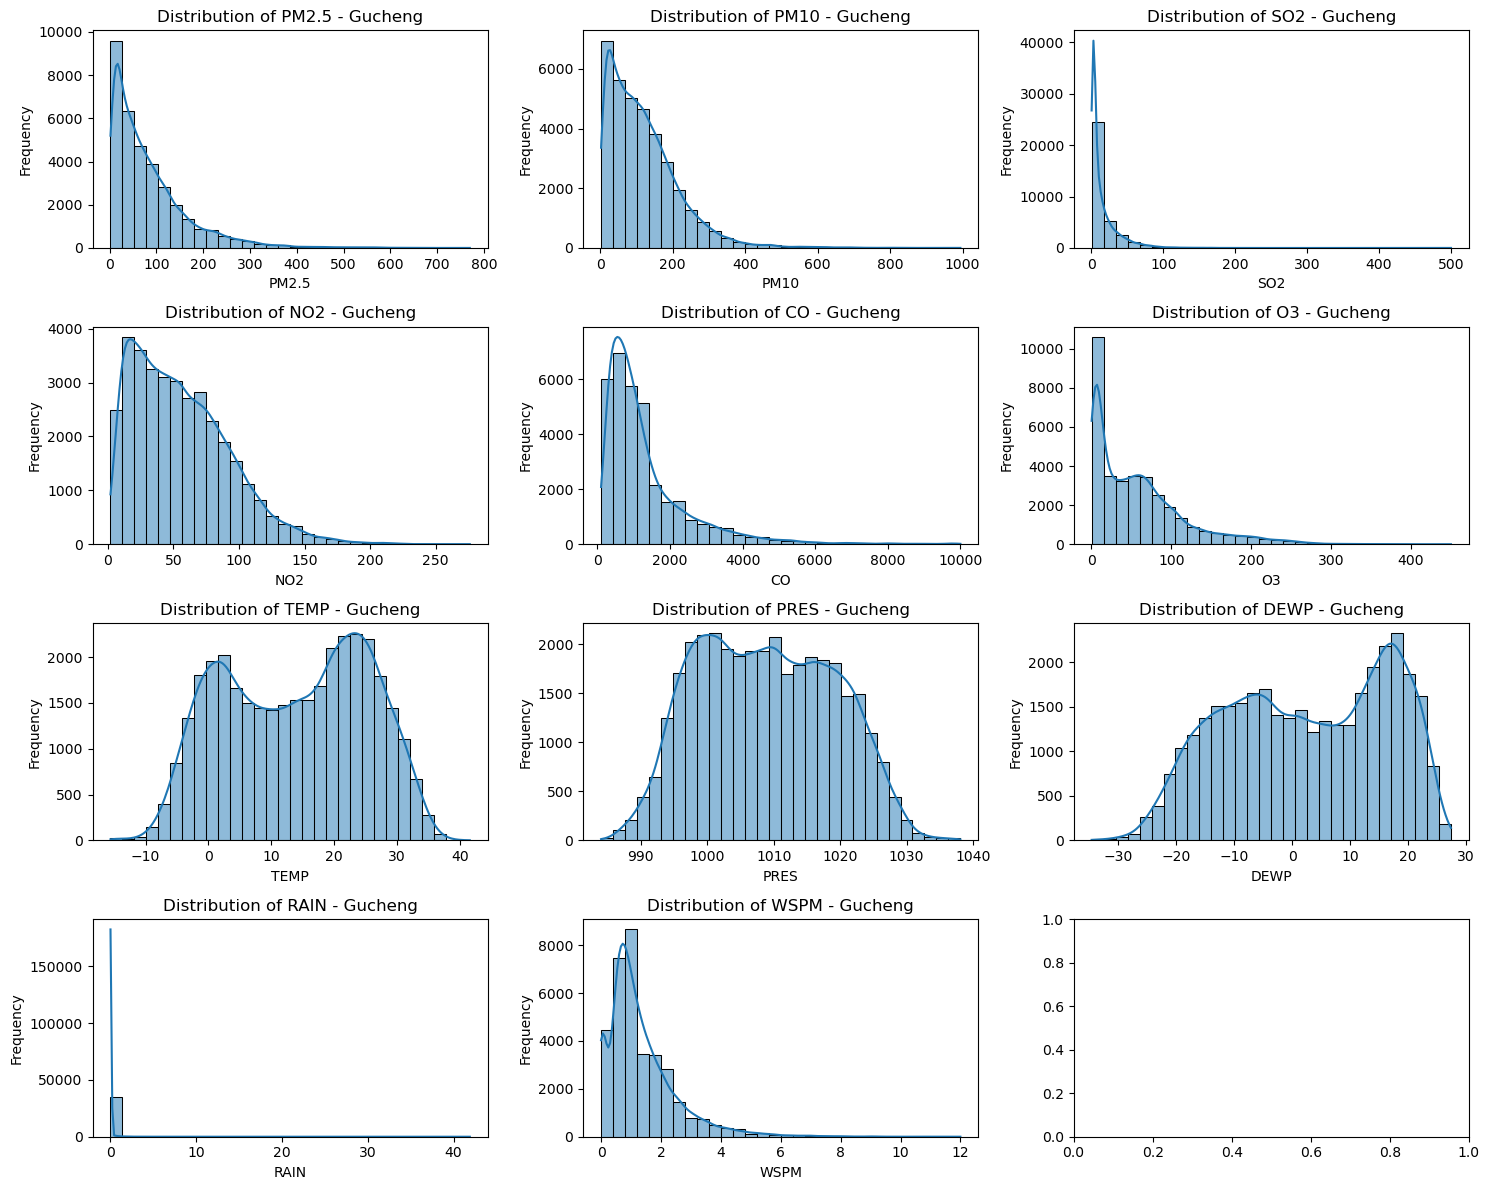



Statistics for Huairou station



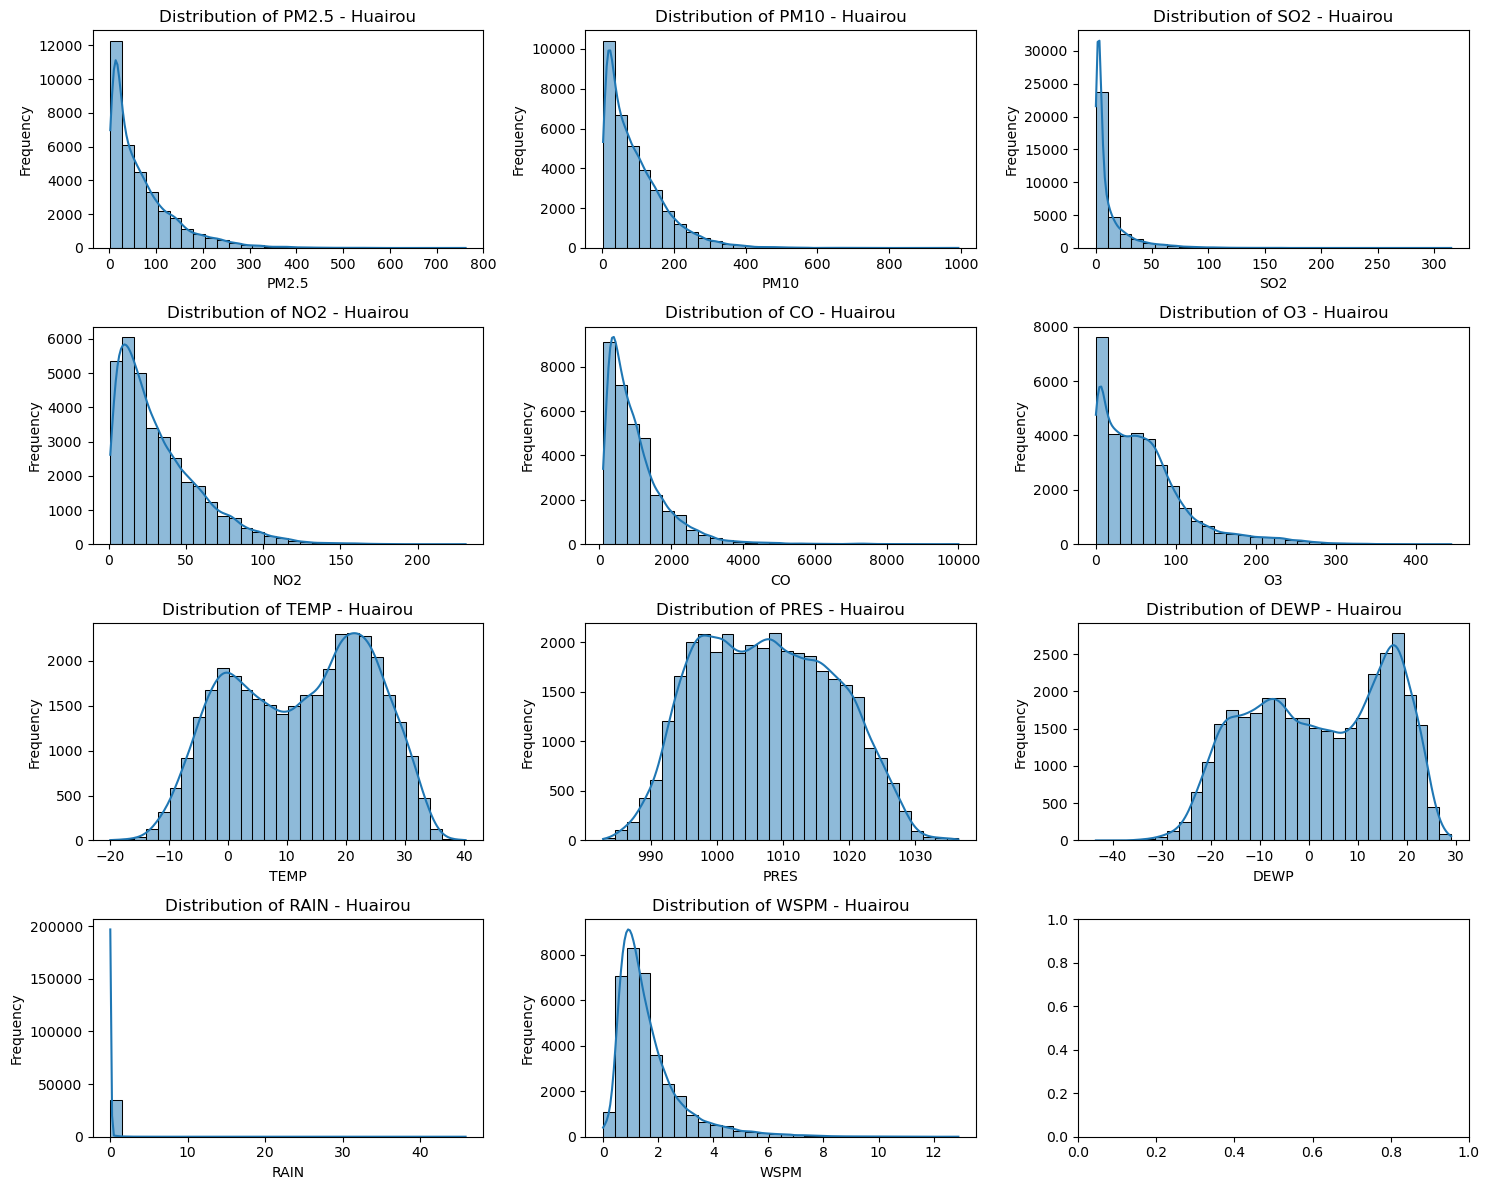



Statistics for Nongzhanguan station



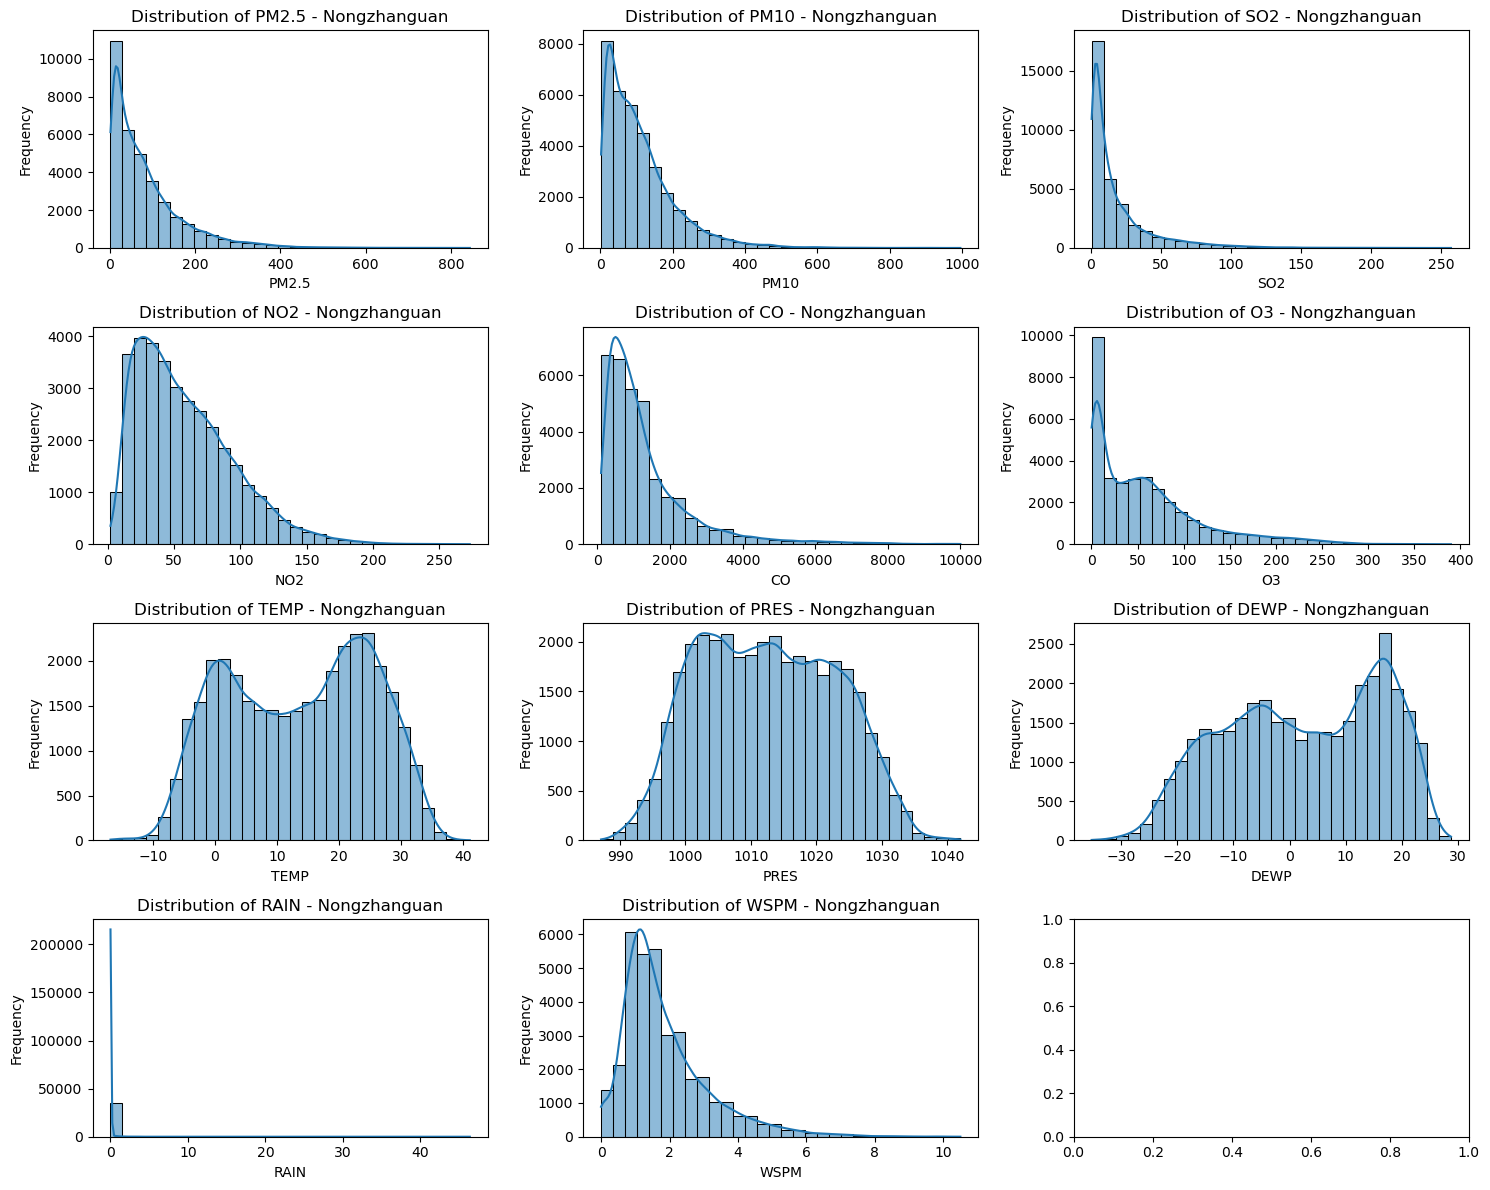



Statistics for Shunyi station



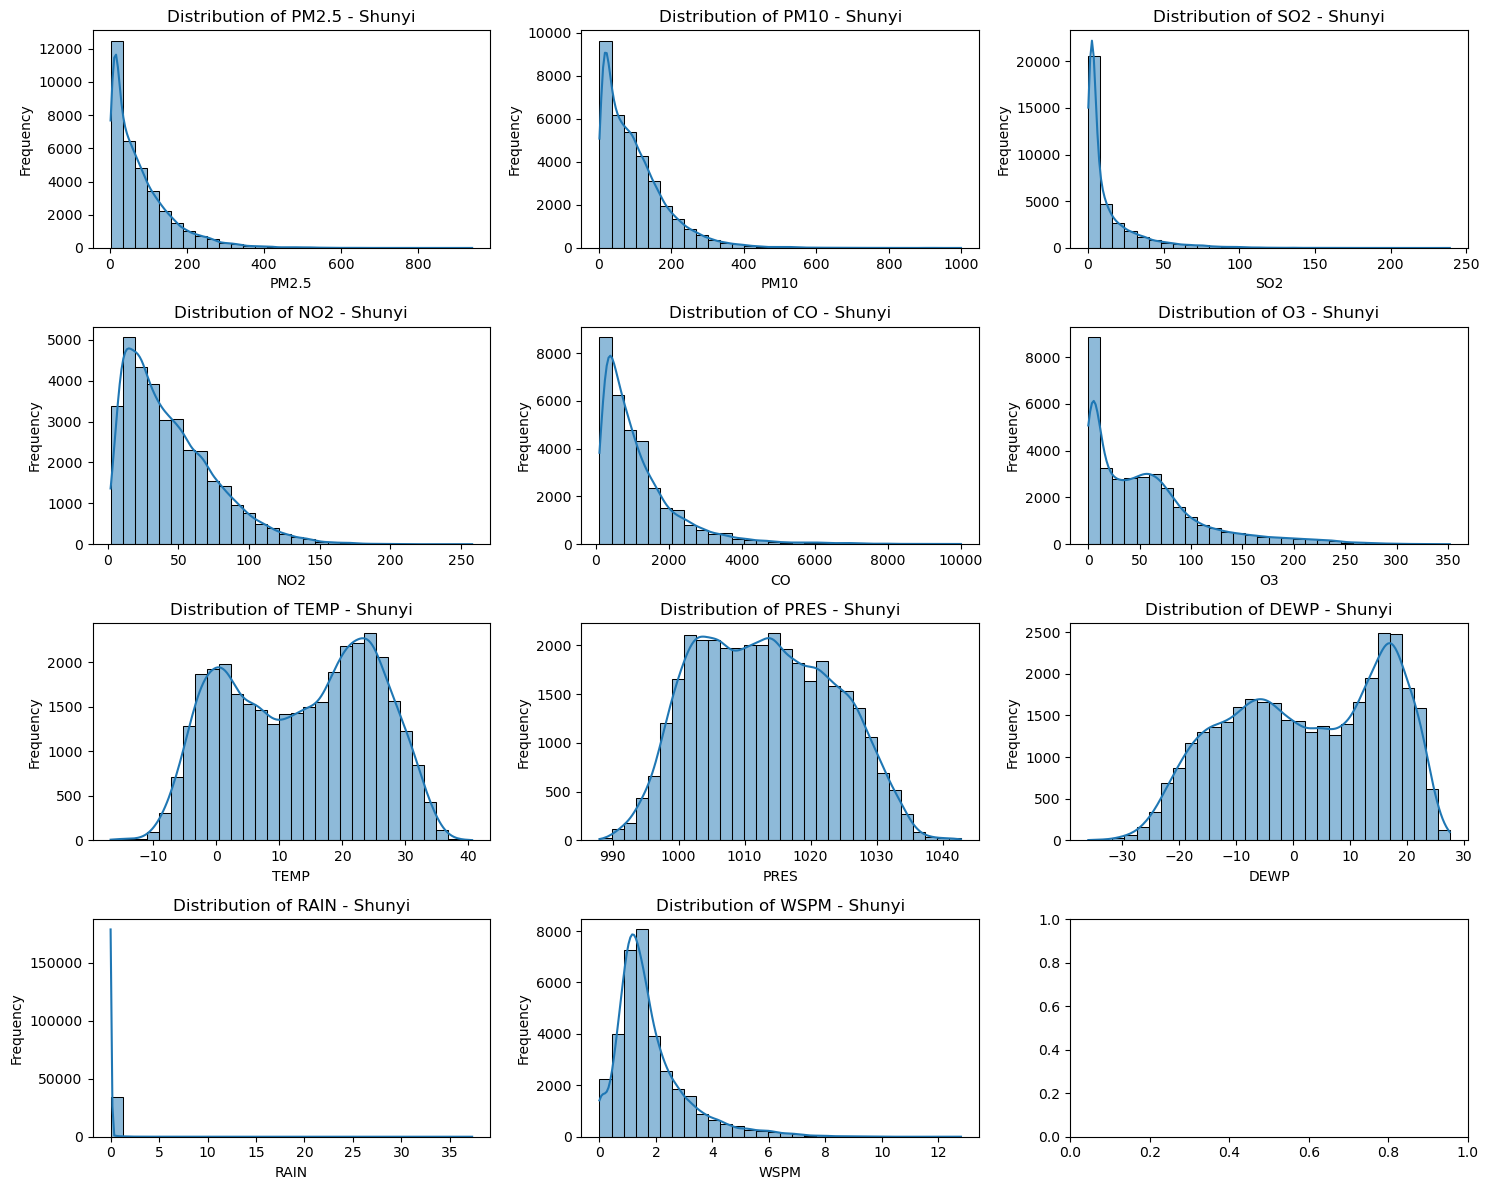



Statistics for Tiantan station



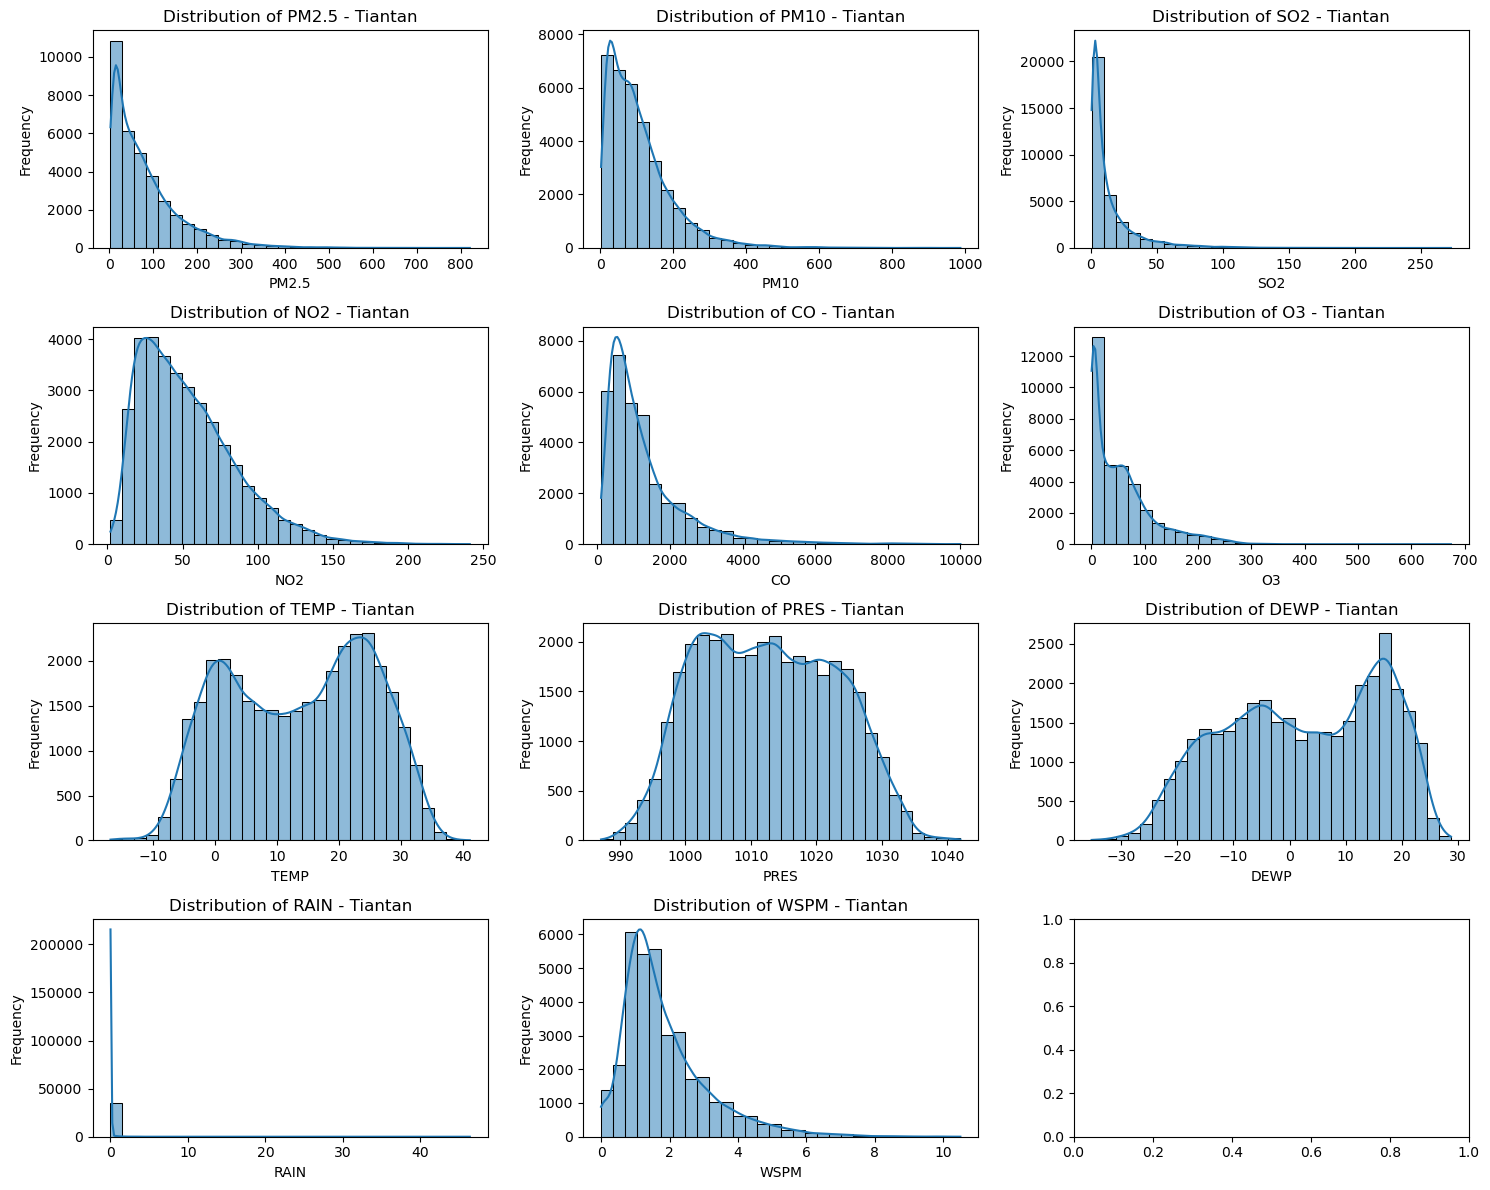



Statistics for Wanliu station



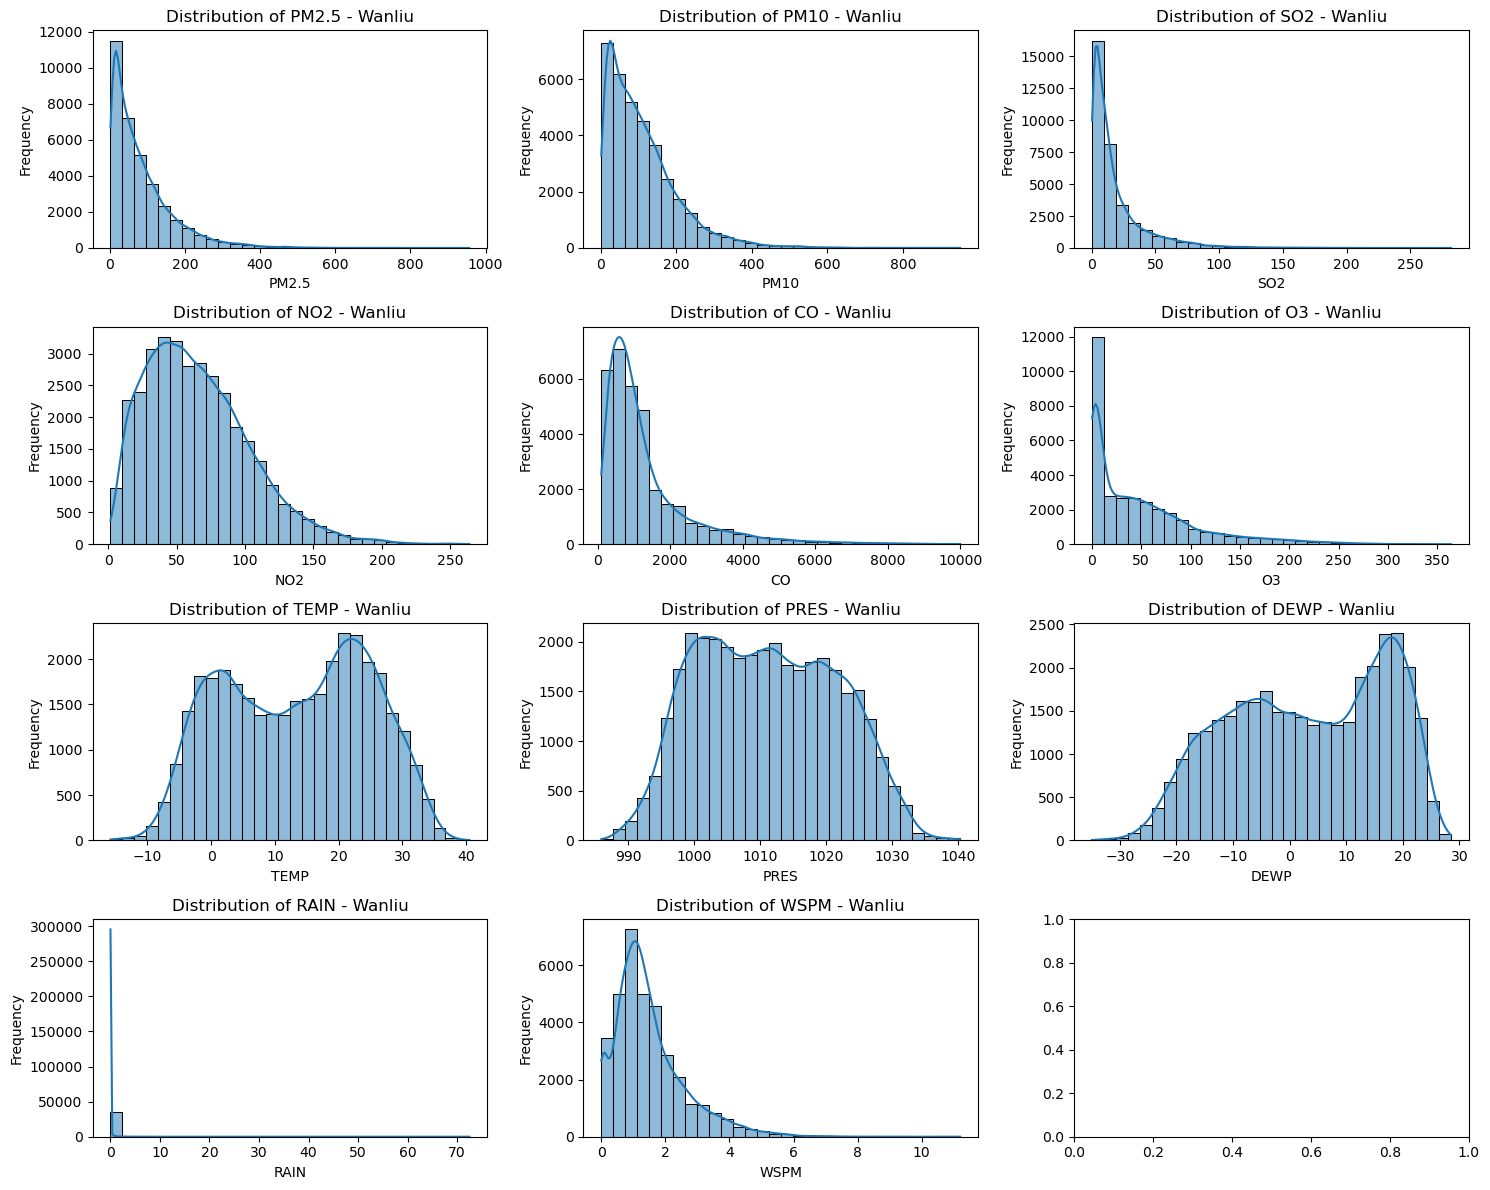



Statistics for Wanshouxigong station



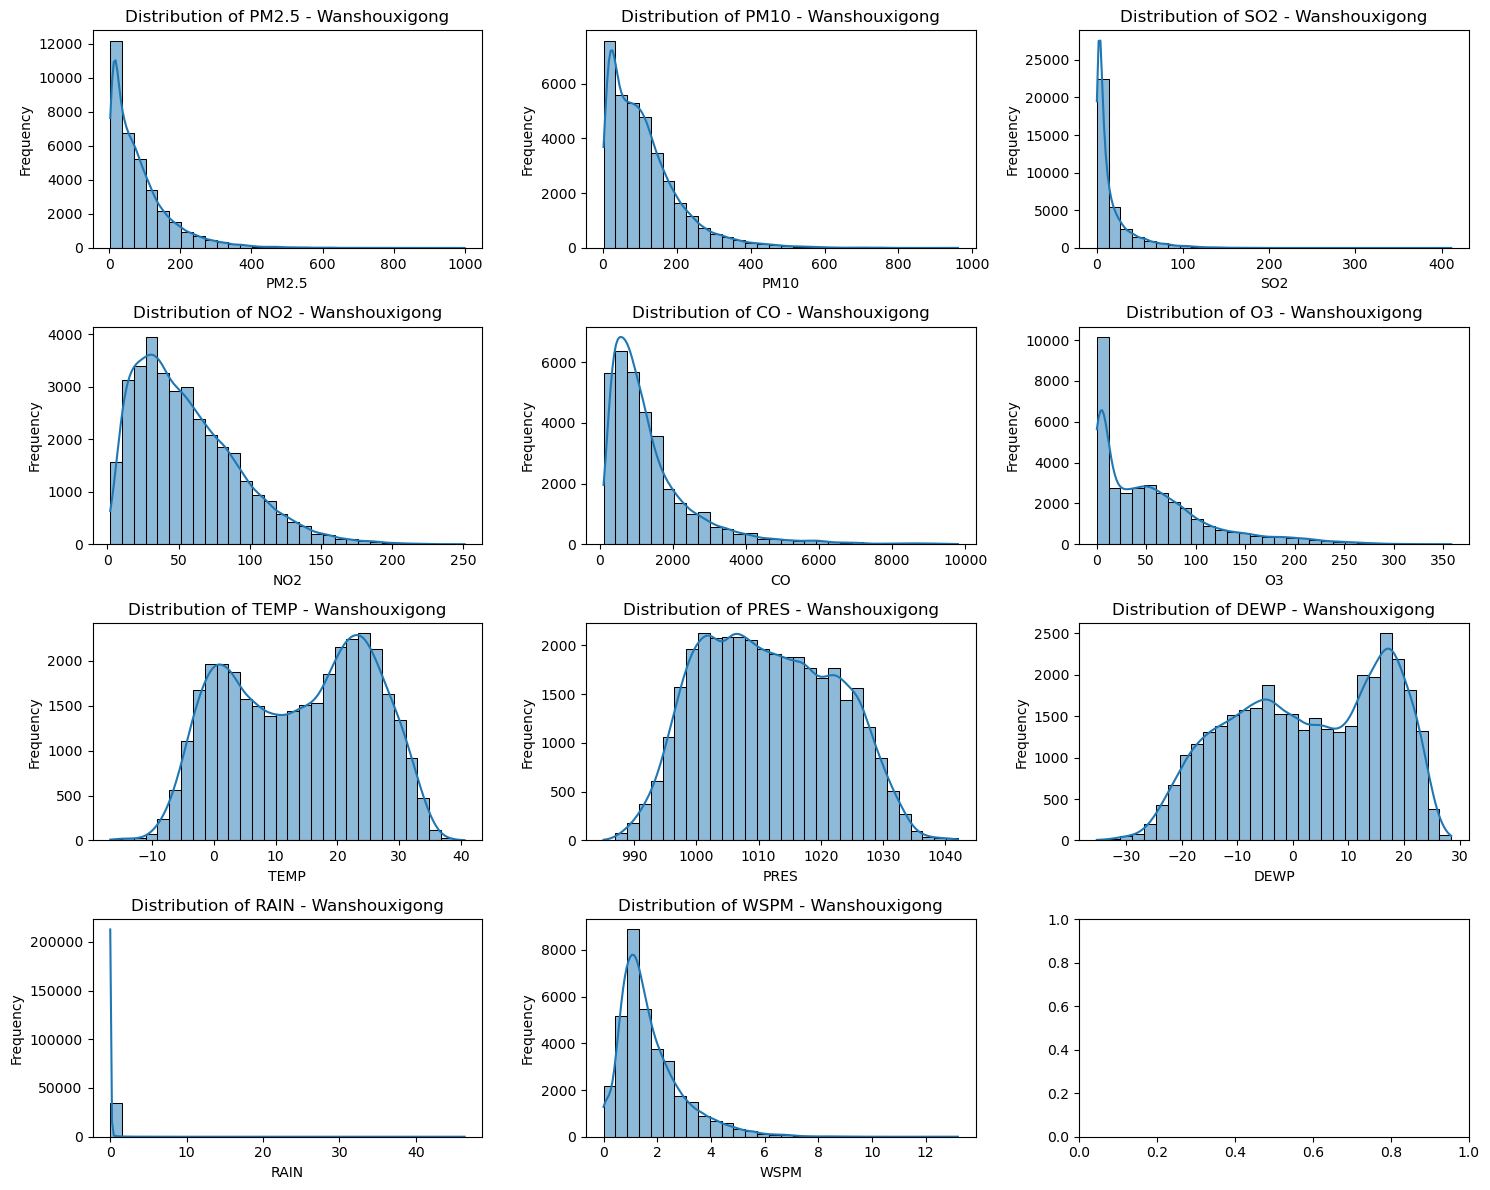

In [36]:
# Iterate through each station
for station in stations:
    print(f'Statistics for {station} station\n')
    
    # Subset data for the station
    station_data = combined_df[combined_df['station'] == station]
    
    # Get statistical description
    station_data[numerical_columns].describe()
    
    # Plot histograms for each numerical column
    fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 12))
    axes = axes.flatten()

    for idx, col in enumerate(numerical_columns):
        sns.histplot(station_data[col].dropna(), bins=30, kde=True, ax=axes[idx])
        axes[idx].set_title(f'Distribution of {col} - {station}')
        axes[idx].set_xlabel(col)
        axes[idx].set_ylabel('Frequency')

    plt.tight_layout()
    plt.show()

    print('\n' + '='*50 + '\n')

Since wind direction is categorical, we can't make a histogram. So we only want to make heatmap to find wind direction frequency by Station

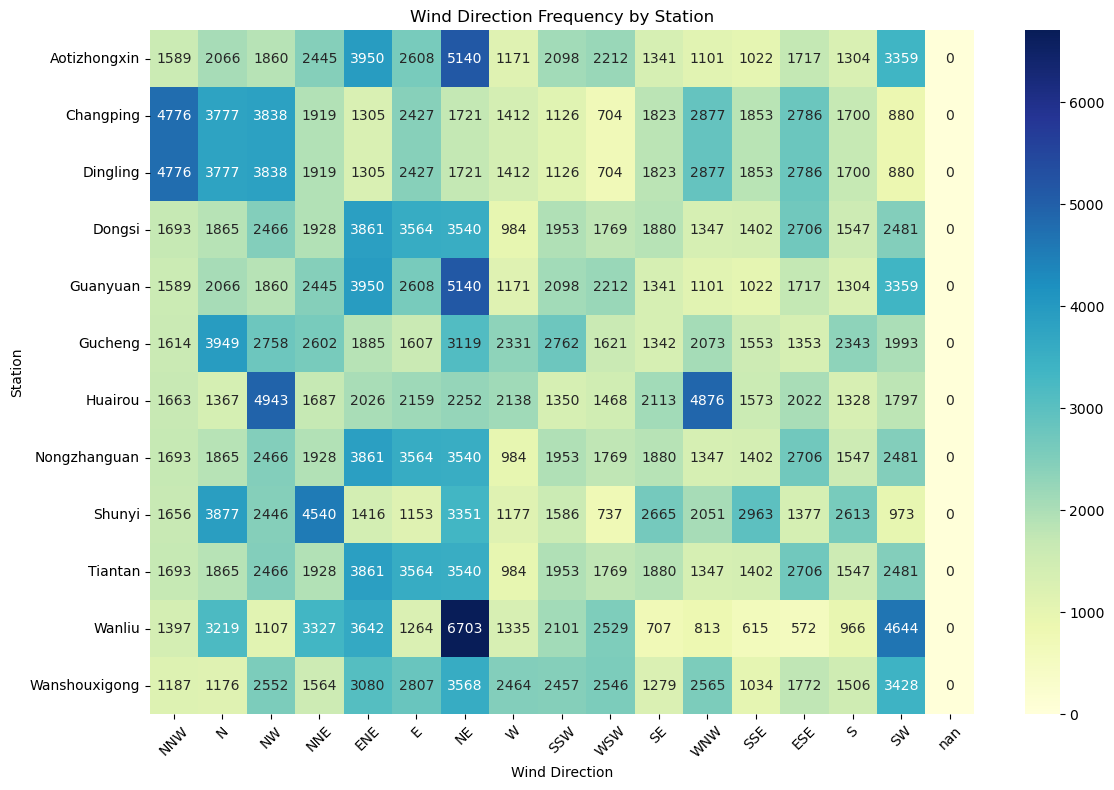

In [24]:
# Initialize an empty DataFrame to store the wind direction counts for each station
wind_direction_df = pd.DataFrame(index=stations, columns=combined_df['wd'].unique())

# Loop through each station
for station in stations:
    # Filter data for the current station
    station_data = combined_df[combined_df['station'] == station]
    
    # Calculate wind direction counts for the current station
    wind_direction_counts = station_data['wd'].value_counts()
    
    # Add wind direction counts to the DataFrame
    wind_direction_df.loc[station] = wind_direction_counts

# Fill missing values with 0
wind_direction_df.fillna(0, inplace=True)

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(wind_direction_df, cmap='YlGnBu', annot=True, fmt='g')
plt.title('Wind Direction Frequency by Station')
plt.xlabel('Wind Direction')
plt.ylabel('Station')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Explore Each Pollutant Average per Hour in Each Station

Select pollutant columns, then group by per hour to calculate pollutant median per hour in each station

In [25]:
pollutants = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']

Calculate the medians, and set the datetime as the index

In [42]:
median_pollutants = imputed_df.groupby([imputed_df['datetime'].dt.to_period('h'), 'station'])[pollutants].median().reset_index()
median_pollutants.set_index('datetime', inplace=True)

In [46]:
median_pollutants.info()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 420768 entries, 2013-03-01 00:00 to 2017-02-28 23:00
Freq: H
Data columns (total 7 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   station  420768 non-null  object 
 1   PM2.5    420768 non-null  float64
 2   PM10     420768 non-null  float64
 3   SO2      420768 non-null  float64
 4   NO2      420768 non-null  float64
 5   CO       420768 non-null  float64
 6   O3       420768 non-null  float64
dtypes: float64(6), object(1)
memory usage: 25.7+ MB


Plot the result

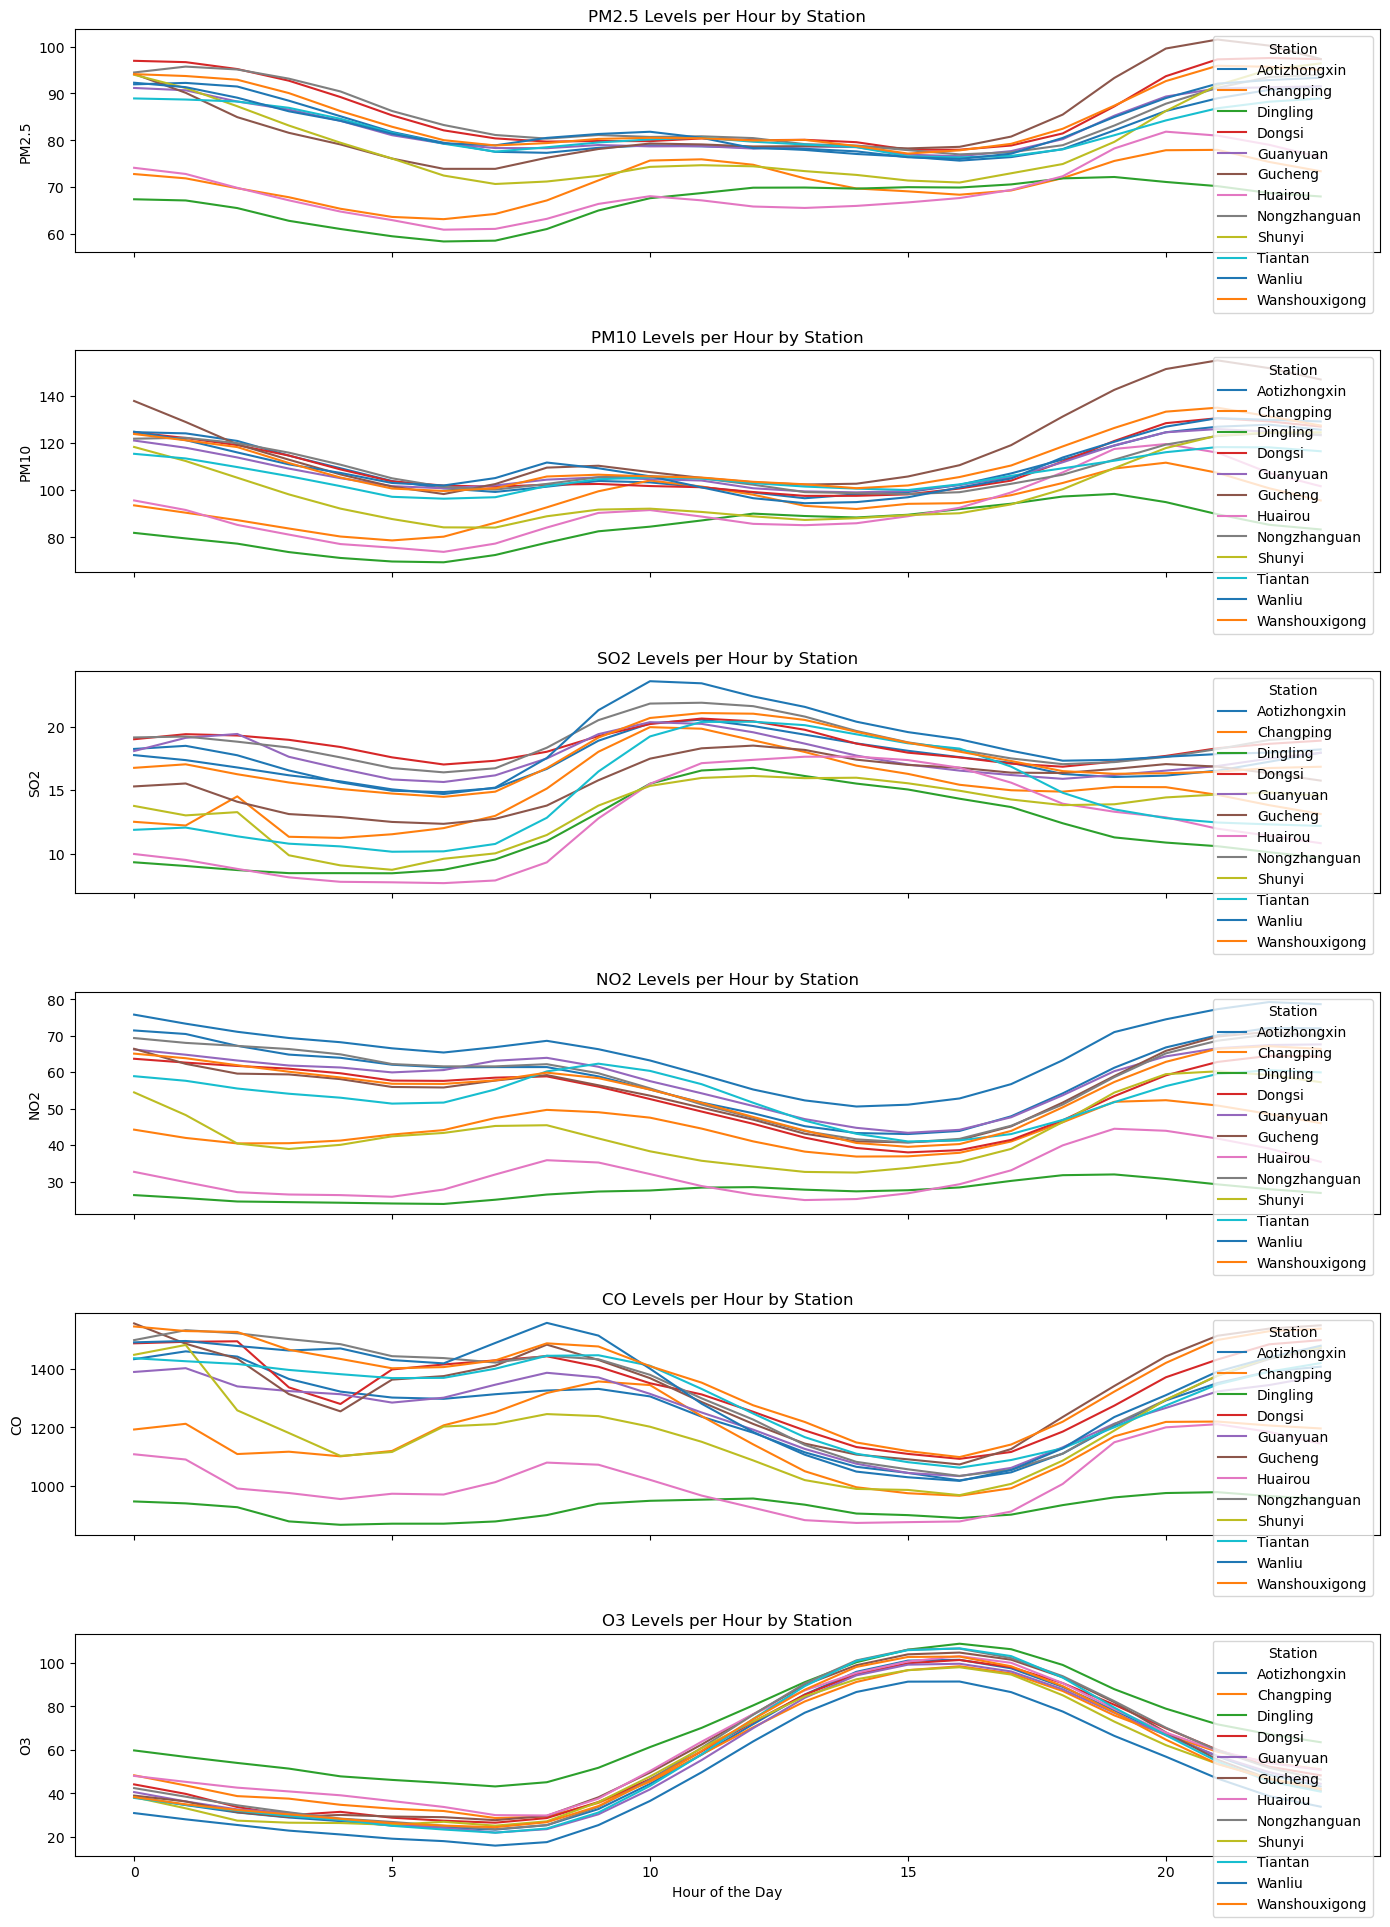

In [28]:
# Create a figure and a set of subplots
fig, axes = plt.subplots(len(pollutants), 1, figsize=(14, 20), sharex=True)

# Plot each pollutant for each station
for i, pollutant in enumerate(pollutants):
    ax = axes[i]
    for station in imputed_df['station'].unique():
        station_data = imputed_df[imputed_df['station'] == station]
        station_hour_avg = station_data.groupby(station_data['datetime'].dt.hour)[pollutant].mean()
        ax.plot(station_hour_avg.index, station_hour_avg, label=station)
    ax.set_title(f'{pollutant} Levels per Hour by Station')
    ax.set_ylabel(pollutant)
    ax.legend(title='Station')

# Set common x-axis label
plt.xlabel('Hour of the Day')
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

## Visualization & Explanatory Analysis

### Pertanyaan 1: Stasiun mana yang memiliki tingkat polusi paling tinggi?

Defining median values over the course of 4 years as "highest amount of pollution"

In [29]:
# Filter float type columns
float_columns = imputed_df.select_dtypes(include='float64').columns

# Calculate the mean for the float type columns grouped by 'station'
station_medians = imputed_df.groupby('station')[float_columns].median()

In [30]:
print("Median values for float type columns grouped by each station (2013-2017):")
station_medians

Median values for float type columns grouped by each station (2013-2017):


PM2.5   PM10   SO2   NO2           CO    O3  TEMP    PRES  \
station                                                                    
Aotizhongxin    58.0   87.0   9.0  53.0   900.000000  41.0  14.5  1011.4   
Changping       46.0   72.0   7.0  36.0   800.000000  46.0  14.6  1007.4   
Dingling        41.0   60.0   5.0  19.0   600.000000  62.0  14.6  1007.4   
Dongsi          61.0   86.0  10.0  47.0  1000.000000  45.0  14.6  1012.2   
Guanyuan        59.0   89.0   8.0  51.0   900.000000  40.0  14.5  1011.4   
Gucheng         60.0  100.0   7.0  50.0   985.714286  45.0  14.8  1008.5   
Huairou         47.0   69.0   4.0  25.0   800.000000  50.0  13.5  1007.3   
Nongzhanguan    59.0   85.0   9.0  51.0   900.000000  45.0  14.6  1012.2   
Shunyi          55.0   77.0   5.0  37.0   900.000000  42.0  14.4  1012.8   
Tiantan         58.0   85.0   7.0  47.0   900.000000  40.0  14.6  1012.2   
Wanliu          59.0   88.0  10.0  61.0   900.000000  29.0  14.3  1010.8   
Wanshouxigong   60.0   91.0   8.0  49.0  1000.000000  42.0  14.8  1011.0   

               DEWP  RAIN  WSPM  
station                          
Aotizhongxin    3.8   0.0   1.4  
Changping       1.7   0.0   1.5  
Dingling        1.7   0.0   1.5  
Dongsi          3.0   0.0   1.5  
Guanyuan        3.8   0.0   1.4  
Gucheng         3.0   0.0   1.0  
Huairou         2.7   0.0   1.3  
Nongzhanguan    3.0   0.0   1.5  
Shunyi          3.1   0.0   1.5  
Tiantan         3.0   0.0   1.5  
Wanliu          4.0   0.0   1.2  
Wanshouxigong   3.3   0.0   1.4

Use plot for easier visualization, highlighting only the top three

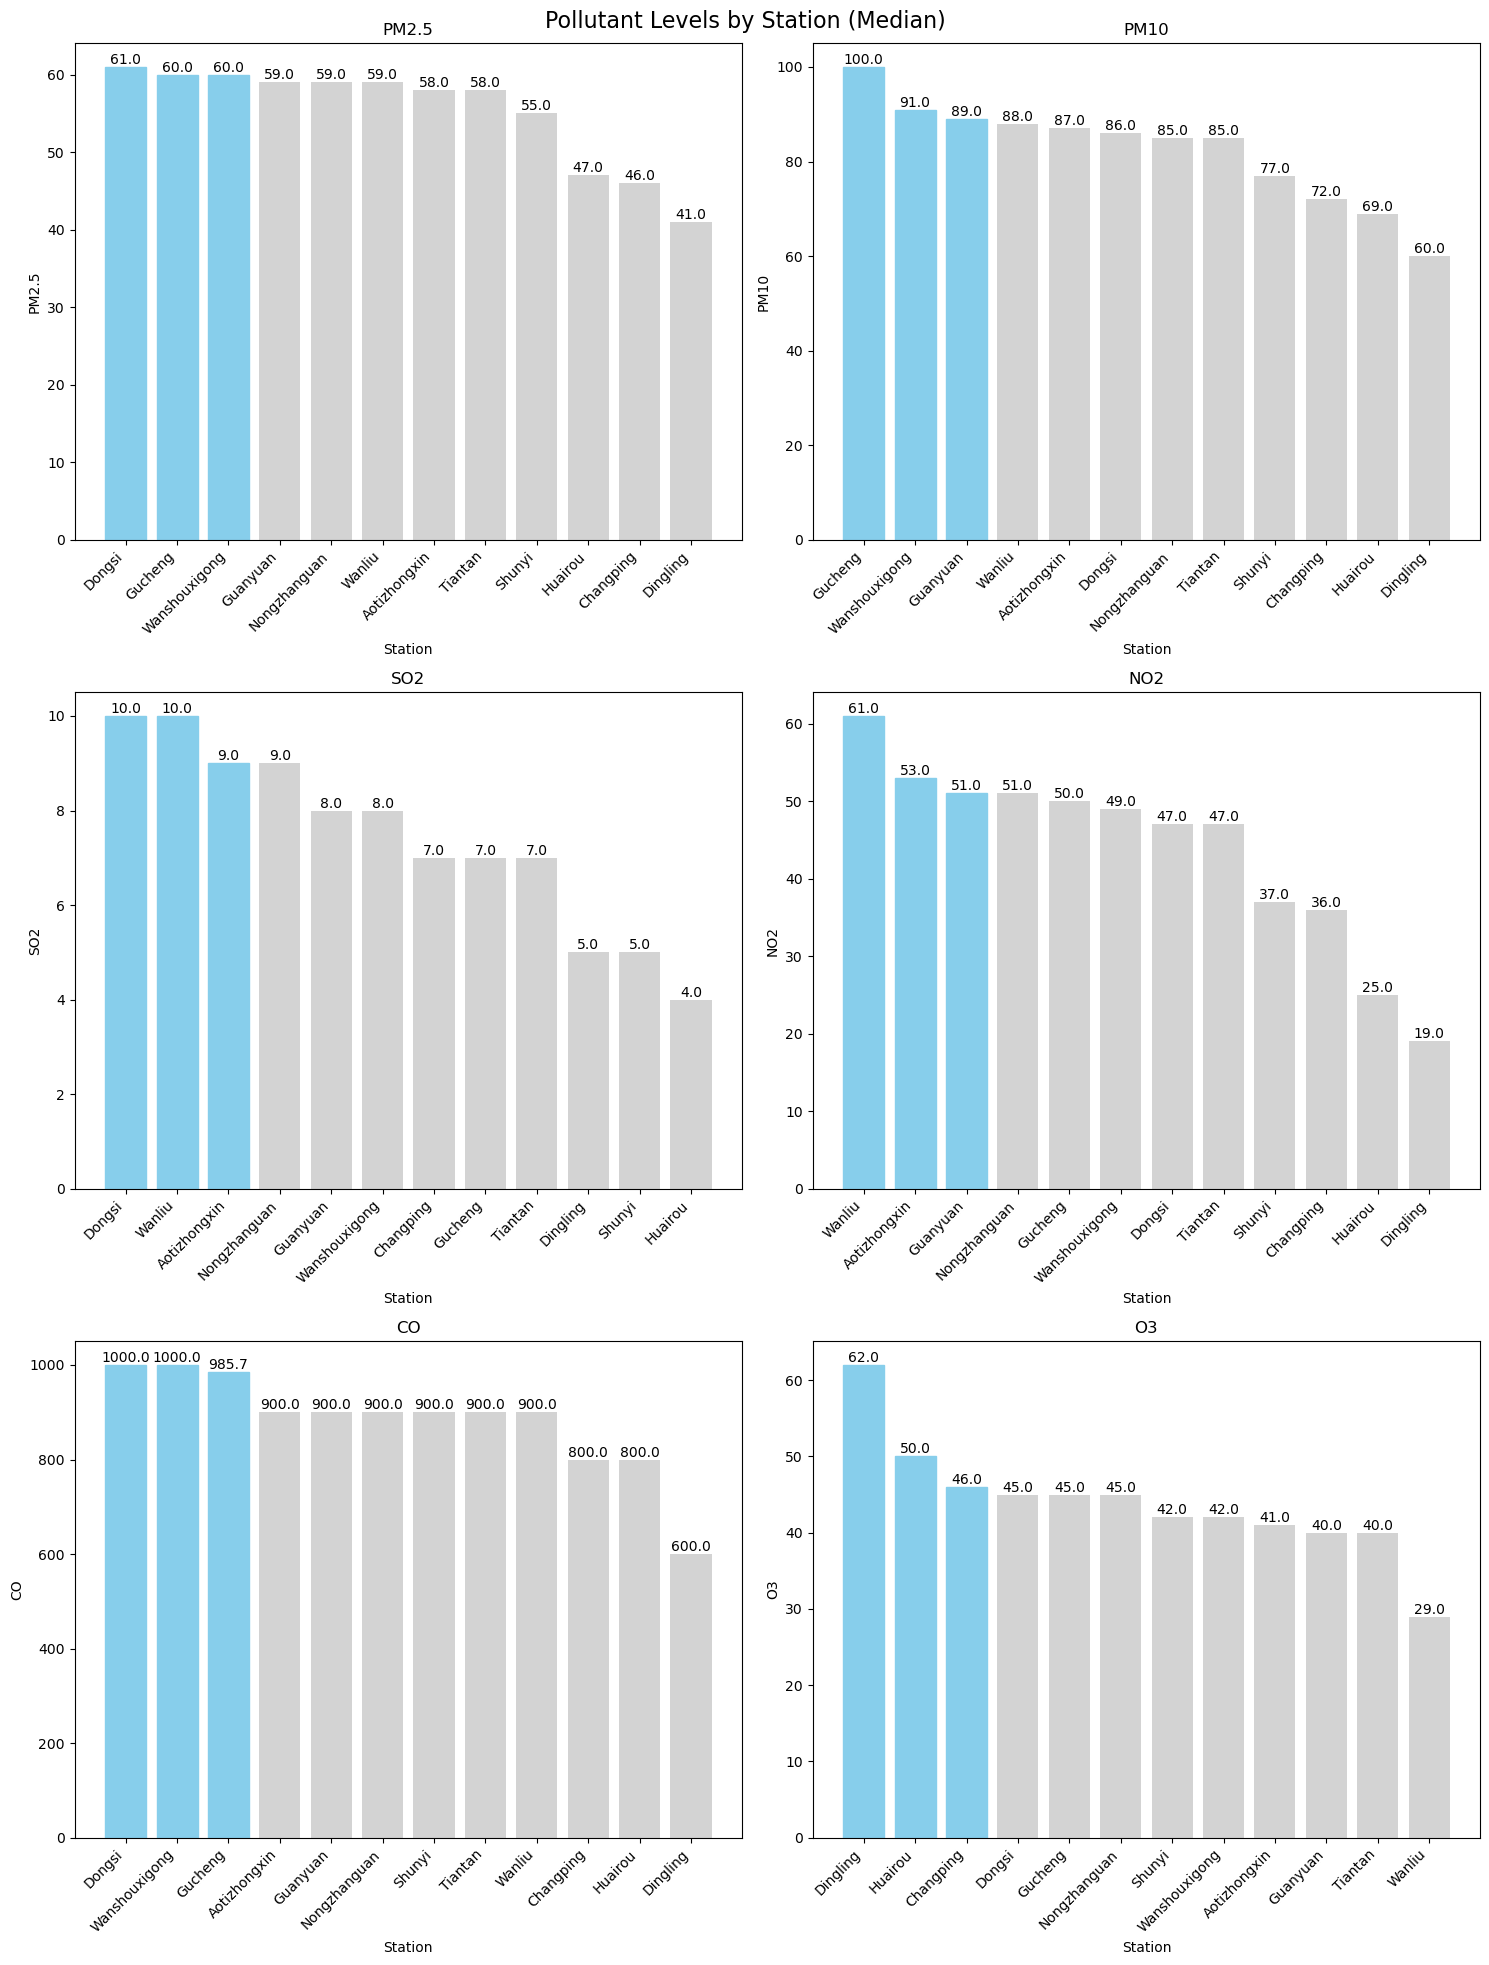

In [32]:
# Plotting individual bar charts for each pollutant
fig, axes = plt.subplots(3, 2, figsize=(15, 20))
fig.suptitle('Pollutant Levels by Station (Median)', fontsize=16)

for i, ax in enumerate(axes.flat):
    if i < len(pollutants):
        pollutant = pollutants[i]
        
        # Sort stations by median pollutant value
        sorted_stations = station_medians.sort_values(by=pollutant, ascending=False)

        bars = ax.bar(range(len(sorted_stations)), sorted_stations[pollutant], color='lightgrey')  # Set default color to gray

        # Highlight top three values
        top_three_indices = sorted_stations.index[:3]
        for idx, bar in enumerate(bars):
            if sorted_stations.index[idx] in top_three_indices:
                bar.set_color('skyblue')  # Highlight top three bars
        
        ax.set_title(pollutant)
        ax.set_xlabel('Station')
        ax.set_ylabel(pollutant)
        ax.set_xticks(range(len(sorted_stations)))
        ax.set_xticklabels(sorted_stations.index, rotation=45, ha='right')
        
        # Add labels with median values on top of each bar
        for bar in bars:
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.1f}', ha='center', va='bottom')
    else:
        ax.axis('off')

plt.tight_layout()
plt.show()

Dapat dilihat stasiun yang memiliki tingkat polusi tertinggi berdasarkan jenis polusi

### Pertanyaan 2: Apakah faktor cuaca pada masing-masing stasiun memiliki korelasi terhadap polusi udara?

Plots for Aotizhongxin station



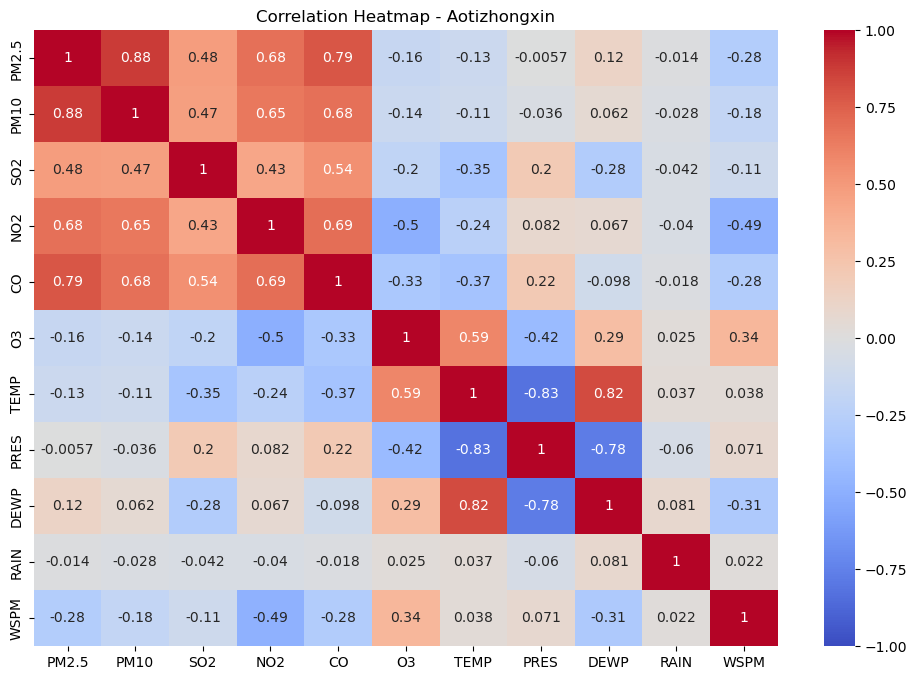



Plots for Changping station



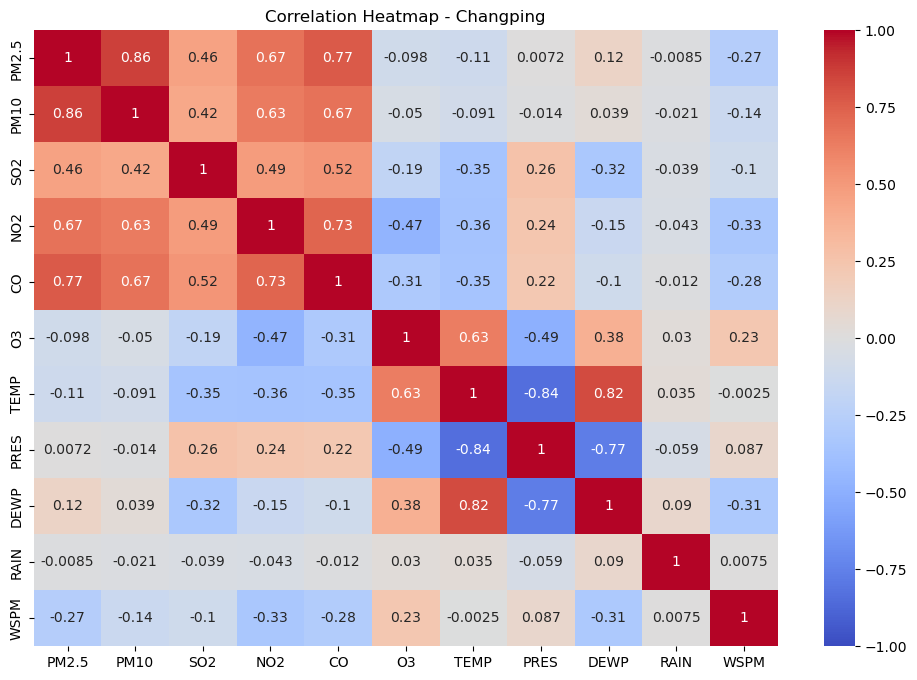



Plots for Dingling station



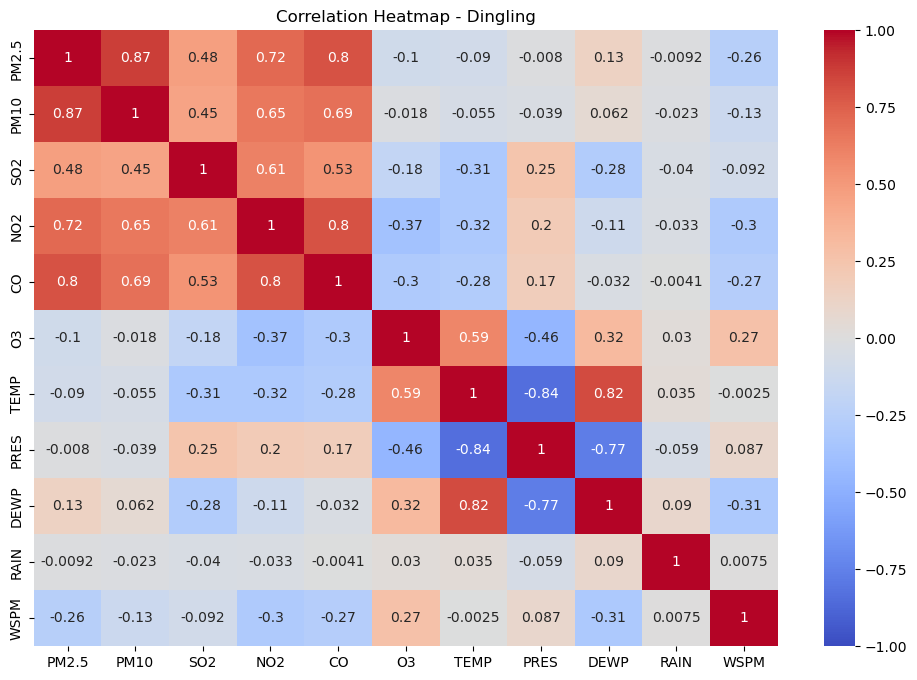



Plots for Dongsi station



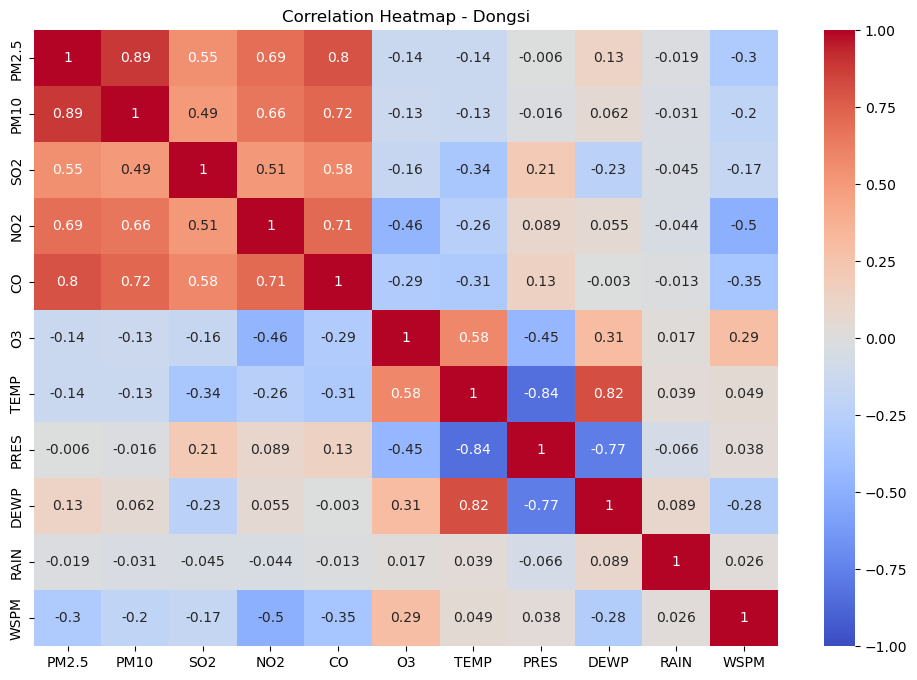



Plots for Guanyuan station



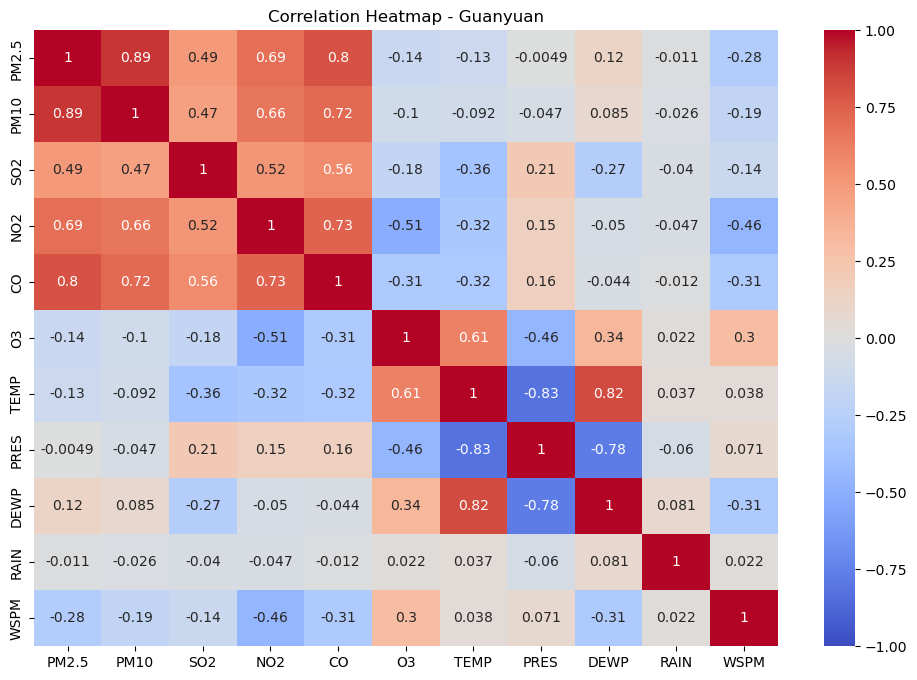



Plots for Gucheng station



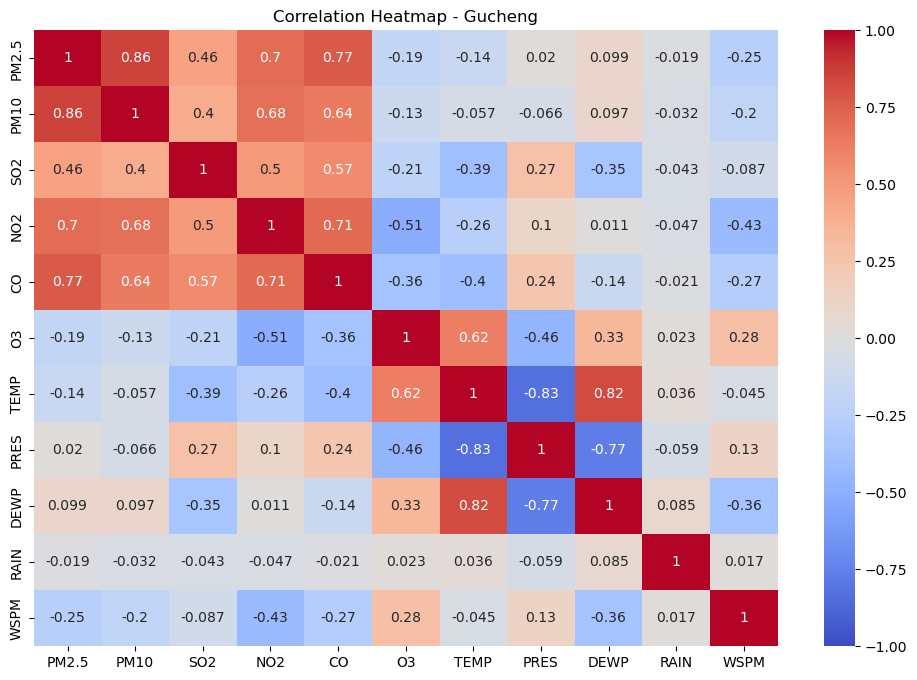



Plots for Huairou station



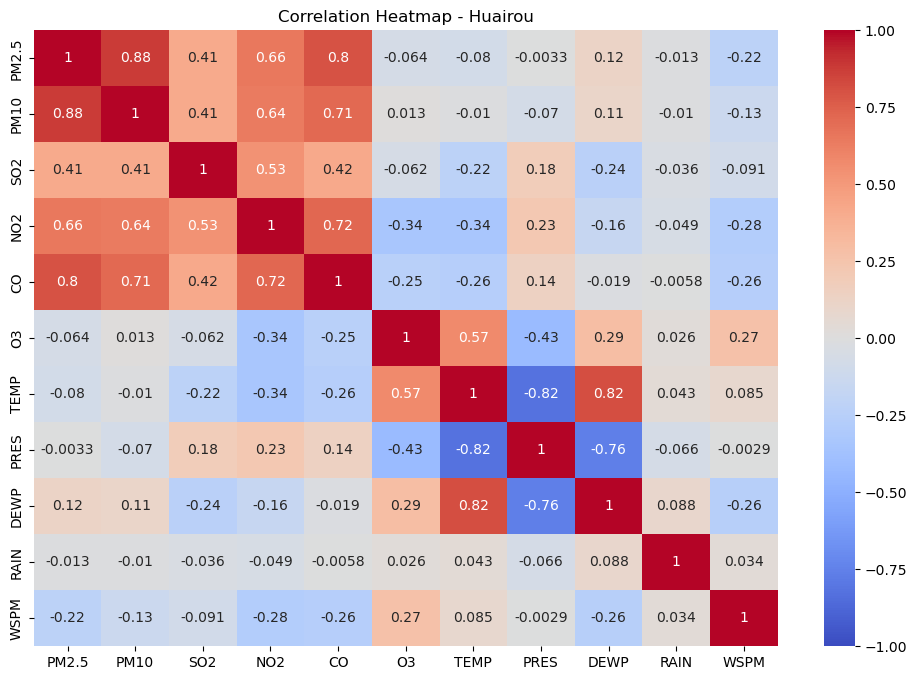



Plots for Nongzhanguan station



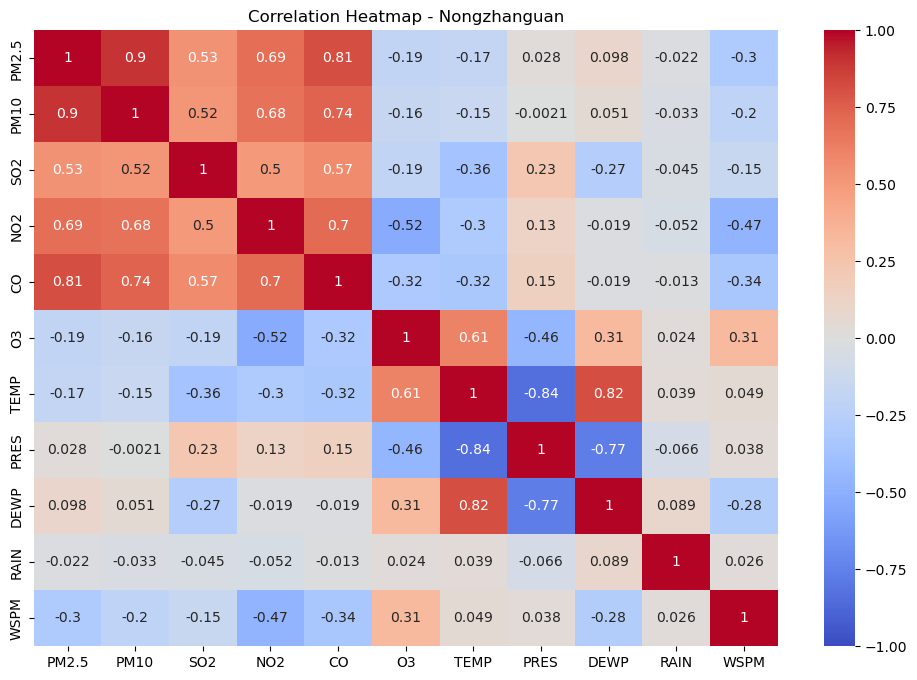



Plots for Shunyi station



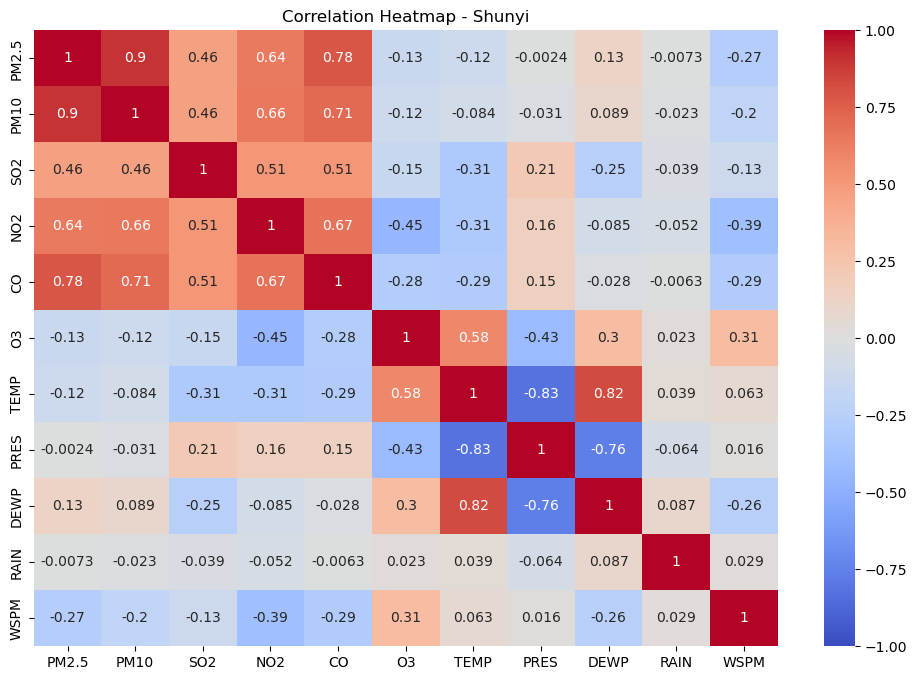



Plots for Tiantan station



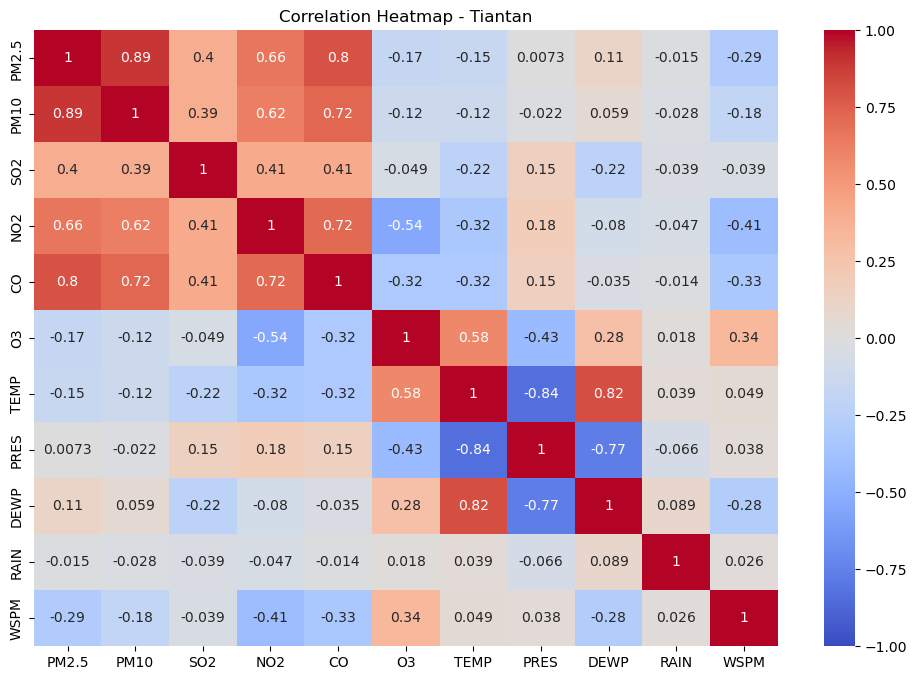



Plots for Wanliu station



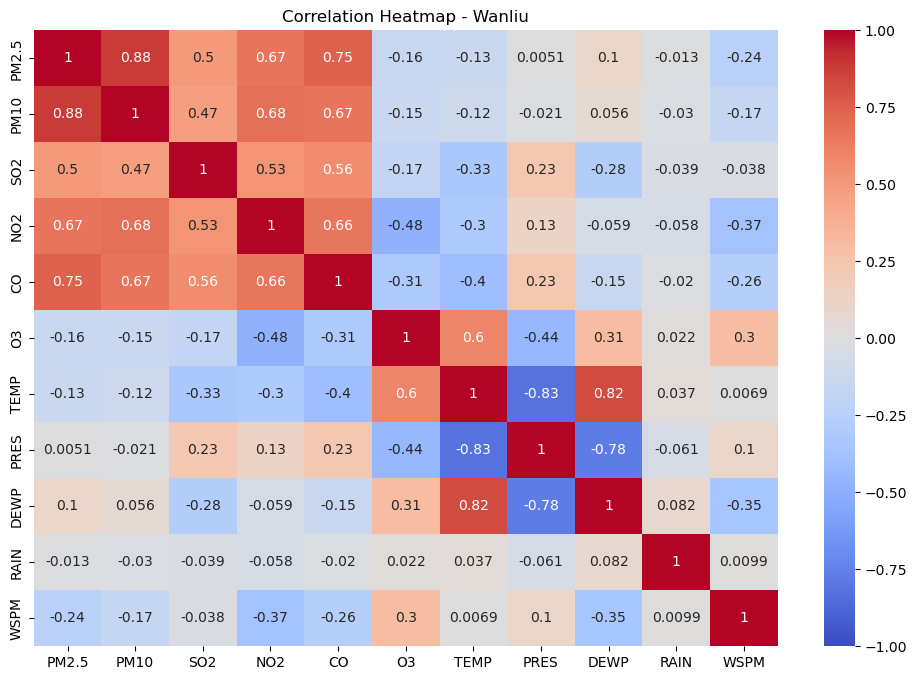



Plots for Wanshouxigong station



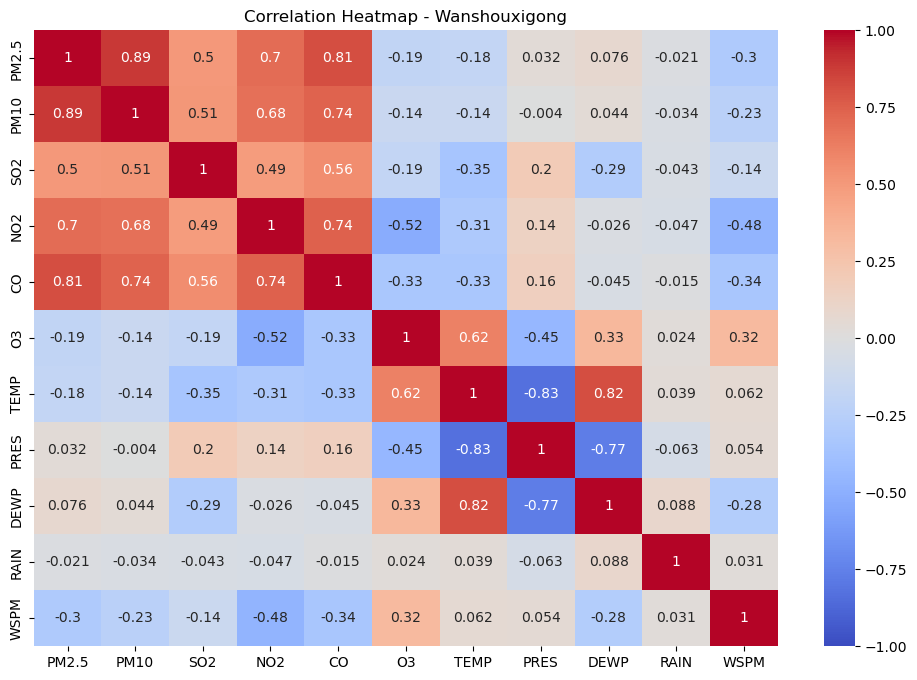

In [35]:
# Iterate through each station
for station in stations:
    print(f'Plots for {station} station\n')
    
    # Subset data for the station
    station_data = combined_df[combined_df['station'] == station]

    # Compute the correlation matrix
    correlation_matrix = station_data[numerical_columns].corr()

    # Plot the heatmap of the correlation matrix
    plt.figure(figsize=(12, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
    plt.title(f'Correlation Heatmap - {station}')
    plt.show()

    print('\n' + '='*50 + '\n')

Correlation of each numerical columns in each station can be seen

### Pertanyaan 3: Apakah ada seasonality pada tingkat polusi di Beijing?

To see seasonality, let's see the levels of pollutants over time from all station and see

C:\Users\ALDY\AppData\Local\Temp\ipykernel_15708\903144988.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  monthly_df = median_pollutants.resample('M').mean()


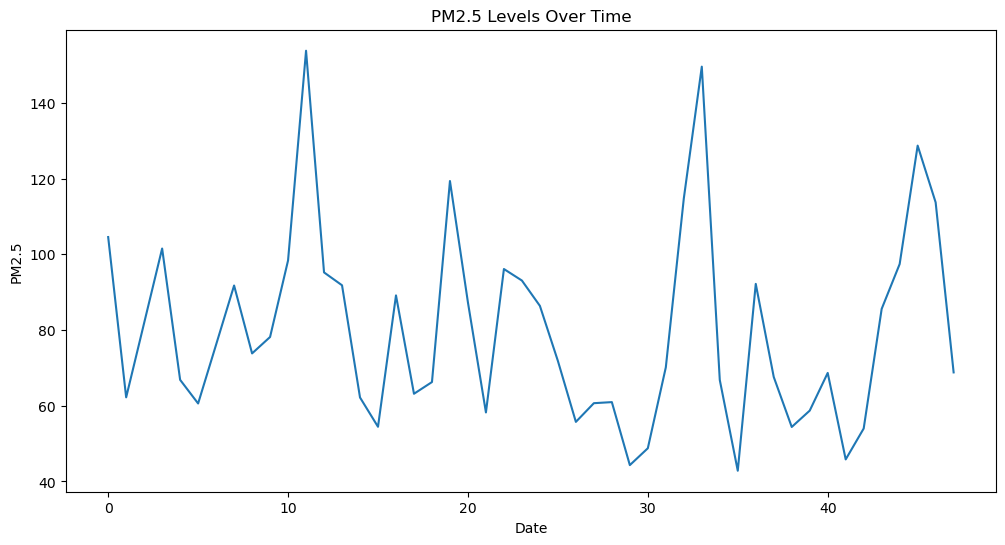

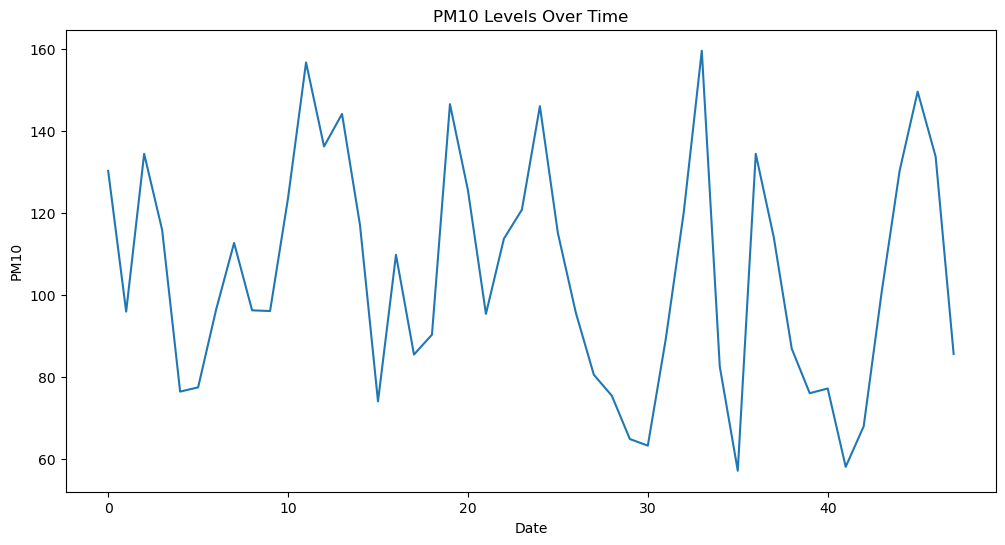

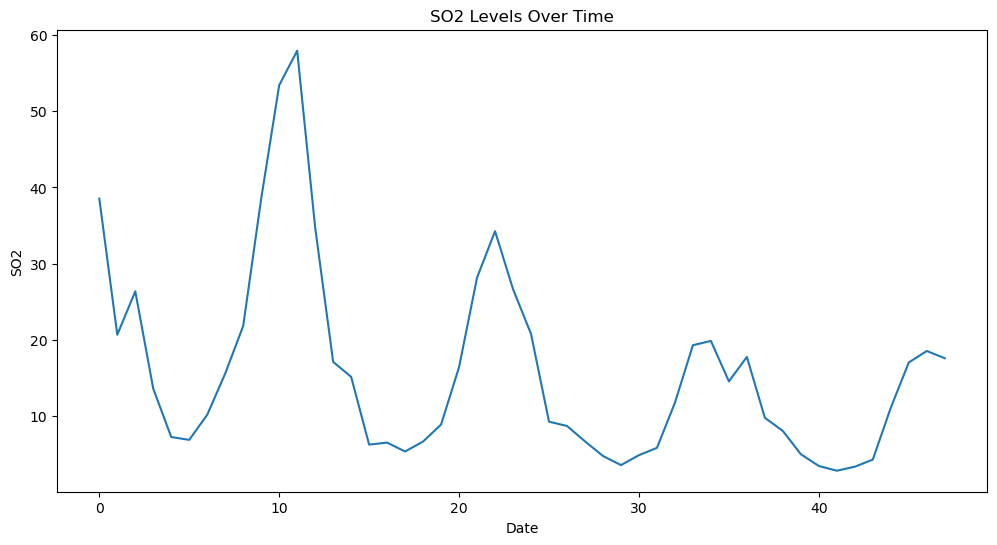

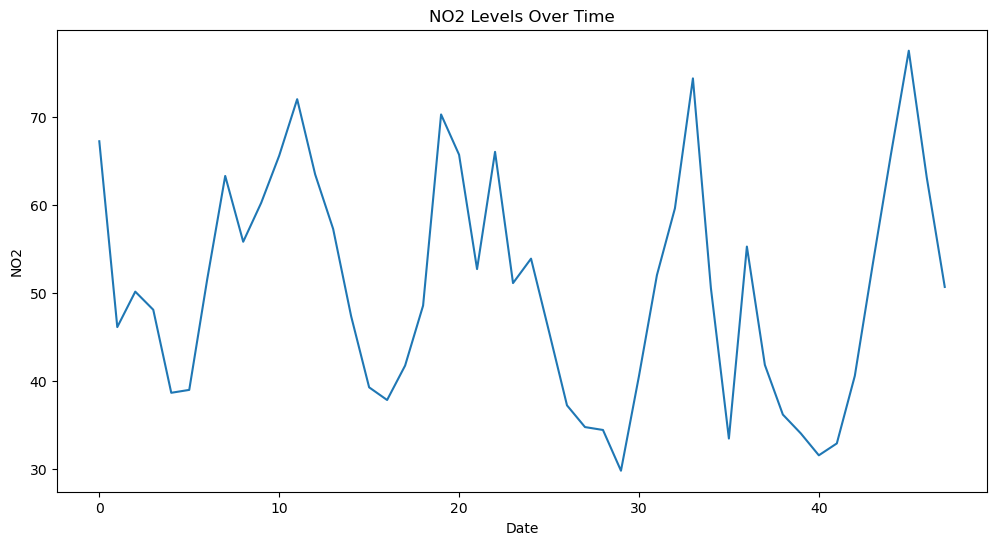

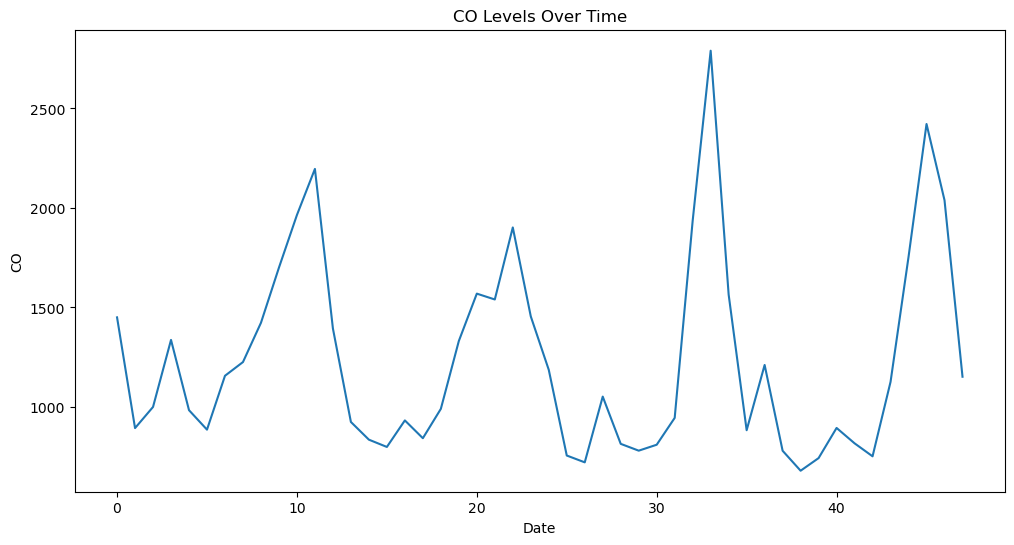

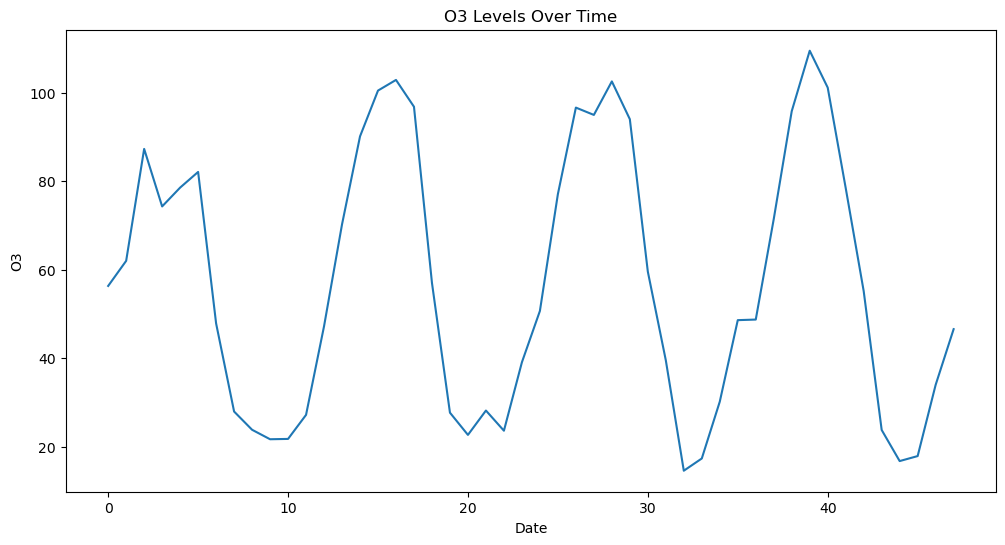

In [48]:
# Convert numeric columns to float and handle missing values
median_pollutants[pollutants] = median_pollutants[pollutants].astype(float)

# Resample and calculate monthly mean
monthly_df = median_pollutants.resample('M').mean()

# Reset index to ensure it's a datetime-like object
monthly_df.reset_index(inplace=True)

# Plot the data
for col in pollutants:
    plt.figure(figsize=(12, 6))
    plt.plot(monthly_df.index, monthly_df[col])
    plt.xlabel('Date')
    plt.ylabel(col)
    plt.title(f'{col} Levels Over Time')
    plt.show()

## Conclusion

Conclusion pertanyaan 1: Dapat dilihat stasiun yang mencatat tingkat polusi tertinggi berdasarkan mean pada masing-masing jenis polusi, yakni:
1. stasiun Dongsi, Gucheng, dan Wanshouxigong mencatat polusi PM 2.5 tertinggi2. stasiun Gucheng, Wanshouxigon, dan Guanyuan mencatat polusi PM 10 tertinggi
3. stasiun Dongsi, Wanliu, dan Aotizhongxin mencatat polusi O2 tertinggi
4. stasiun Wanliu, Aotizhongxin, dan Guanyuan mencatat polusi NO2 tertinggi
5. stasiun Dongsi, Wanshouxigon, dan Gucheng mencatat polusi CO tertinggi
6. stasiun Dingling, Huairou, dan Changping mencatat polusi O3 tertinggi2.5 


Conclusion pertanyaan 2:
1. Secara umum, dapat dilihat bahwa temperatur dan dew point cukup berkorelasi positif terhadap tingkat polusi O3 di semua stasiun (~0,6 dan 0,3)
2. Ada beberapa tingkat polusi lain yang memiliki korelasi positif dengan faktor temperatur, namun tidak ditemukan di semua stasiun

Conclusion pertanyaan 3:
1. Untuk PM 2.5 dan PM10, terlihat bahwa tidak ada seasonality dalam satu tahun
2. Untuk SO2, NO2, dan CO, terlihat bahwa seasonality berupa adanya kenaikan tajam pada awal tahun dan menurun pada akhir tahun
3. Untuk O3, dapat dilihat bahwa seasonality berupa adanya kenaikan tajam pada pertengahan tahun dan menurun pada awal tahun